In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import re
import time
import warnings
warnings.filterwarnings("ignore") 

from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,KFold,RepeatedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import wilcoxon
import scipy.stats as stats
import random


from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statistics

In [2]:
dia_data=pd.read_csv('diabetes.csv')
dia_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
dia_data.shape

(768, 9)

In [4]:
dia_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# Percentage of patients have and do not have breast cancer
dia_data['Outcome'].value_counts()/dia_data.shape[0]*100 

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

## Analyzing Data

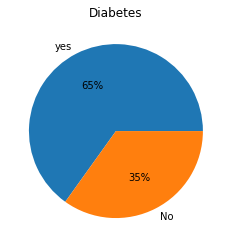

In [6]:
# plot to display the percentage of the people having and not having breast cancer 
labels = ['yes', 'No']
values = dia_data['Outcome'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Diabetes')
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

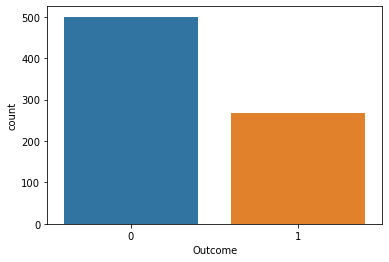

In [7]:
sns.countplot(x='Outcome',data=dia_data)

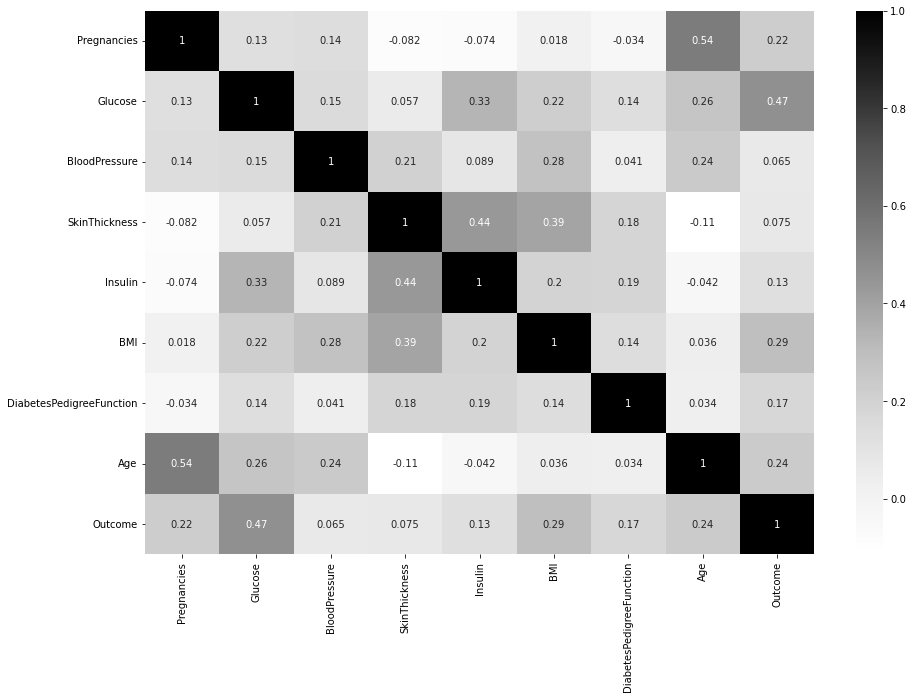

In [8]:
# Correlation map
plt.figure(figsize=(15, 10))
sns.heatmap(dia_data.corr(), annot = True, cmap = "Greys")
plt.show()

## Data Wrangling

In [9]:
dia_data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
dia_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data preprocessing

In [11]:
X=dia_data.drop('Outcome',axis=1)
y=dia_data["Outcome"]
y_label = dia_data['Outcome'].values.reshape(X.shape[0], 1)
headers = X.columns

X = preprocessing.minmax_scale(X, feature_range=(0.001, 1))
X= pd.DataFrame(X)
X.columns = headers

## Training Data & Evaluating ML Models

## SVC

Accuracy: 76.34114583333333
Precision: 54.68997904311973
Recall: 71.16405551088297
f1_score: 61.63467946675977
AUC: 0.7476906645791178
Standard deviation of accuracy:  0.01697071768798205
Standard deviation of precision:  0.04388895556627395
Standard deviation of recall:  0.048670519734897735
Standard deviation of f1_score:  0.028394101359843674
Standard deviation of AUC:  0.022247934877169542


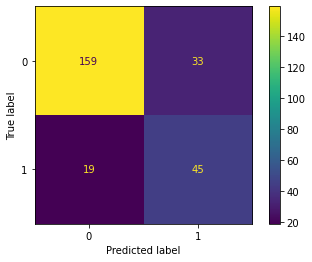

In [12]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy1 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sv = SVC()
    y_pred = fit_eval_model(sv, X_train, y_train, X_test, y_test)

    accuracy1.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy1)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy1))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## RandomForest Classifier

Accuracy: 75.9375
Precision: 57.812776792513176
Recall: 68.6276748430512
f1_score: 62.538126235133305
AUC: 0.7388120555248427
Standard deviation of accuracy:  0.021162981057530134
Standard deviation of precision:  0.04968301102202121
Standard deviation of recall:  0.056560258027590314
Standard deviation of f1_score:  0.03550490191252286
Standard deviation of AUC:  0.028573804311229054


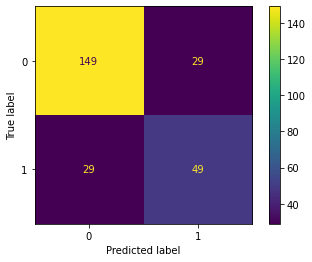

In [13]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy2 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier()
    y_pred = fit_eval_model(rf, X_train, y_train, X_test, y_test)

    accuracy2.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy2)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy2))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Ada Boost Classifier

Accuracy: 74.3359375
Precision: 57.780096266236455
Recall: 65.06417513310122
f1_score: 60.99421352075708
AUC: 0.7185926261590672
Standard deviation of accuracy:  0.018239907293528347
Standard deviation of precision:  0.04779326901854511
Standard deviation of recall:  0.05014813173739015
Standard deviation of f1_score:  0.03228863598593232
Standard deviation of AUC:  0.024136334644530265


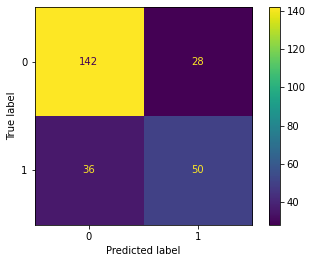

In [14]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy3 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ab = AdaBoostClassifier()
    y_pred = fit_eval_model(ab, X_train, y_train, X_test, y_test)

    accuracy3.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy3)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy3))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Gradient boosting Classifier

Accuracy: 75.63802083333333
Precision: 58.845654600052846
Recall: 67.48301757650756
f1_score: 62.6428098648098
AUC: 0.7342419108964349
Standard deviation of accuracy:  0.019718481170863642
Standard deviation of precision:  0.05086595665369014
Standard deviation of recall:  0.05395293602492587
Standard deviation of f1_score:  0.03629901824163749
Standard deviation of AUC:  0.02626859512390656


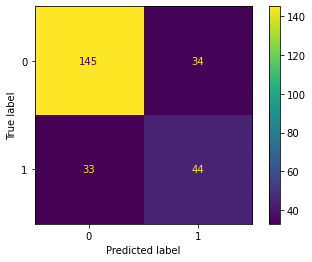

In [15]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy4 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gb = GradientBoostingClassifier(random_state = 1)
    y_pred = fit_eval_model(gb, X_train, y_train, X_test, y_test)

    accuracy4.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy4)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy4))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

## Logistic Regression

Accuracy: 76.54947916666667
Precision: 50.81060174112656
Recall: 74.04749791644599
f1_score: 60.10818448185904
AUC: 0.7572523480350093
Standard deviation of accuracy:  0.01724139684917391
Standard deviation of precision:  0.04055937773912255
Standard deviation of recall:  0.03703347615637035
Standard deviation of f1_score:  0.026714493624329243
Standard deviation of AUC:  0.017709282513352197


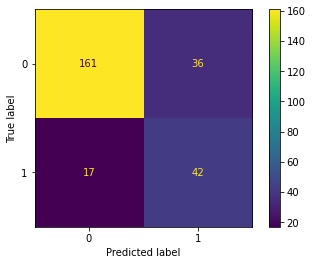

In [16]:
yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))

def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

accuracy5 = []
precision = []
f1score = []
recall = []
auc=[]
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)

for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lg = LogisticRegression(random_state = 1,solver='lbfgs', max_iter=1000)
    y_pred = fit_eval_model(lg, X_train, y_train, X_test, y_test)

    accuracy5.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
print('Accuracy:', np.mean(accuracy5)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy5))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

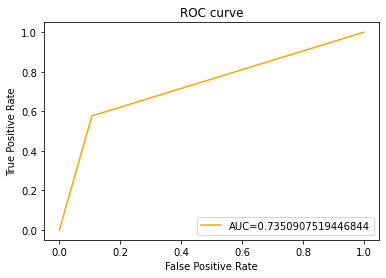

In [17]:
y_pred_proba = sv.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

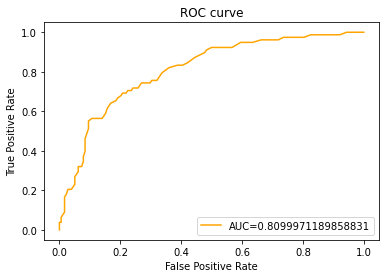

In [18]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

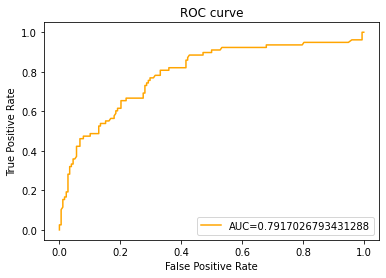

In [19]:
y_pred_proba = ab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

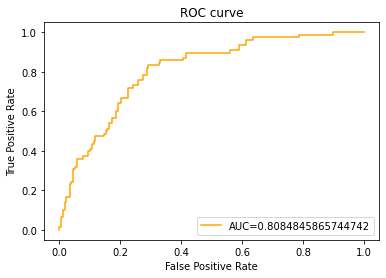

In [20]:
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

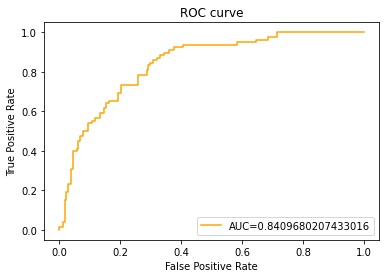

In [21]:
y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hypertuning ML Models

## Gradient Boosting Classifier

Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.7493654151242729
Test accuracy: 70.12987012987013
Precision: 48.93617021276596
Recall: 51.11111111111111
F1 score: 50.0
AUC score: 0.6454638124362895
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 1, 'max_depth': 1, 'max_features': 1, 'n_estimators': 50}

Mean cross-validated training accuracy score: 0.7637493389740877
Test accuracy: 75.97402597402598
Precision: 78.37837837837837
Recall: 50.0
F1 score: 61.05263157894737
AUC score: 0.7083333333333334
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'friedman_mse', 'learning_rate': 1, 'ma

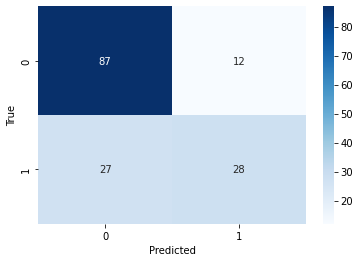

In [22]:
#-------------------------------------------------GridSearchCV-----------------------------------------------------#
best_params_list1=[]
ac_list1=[]
start = time.time()
    
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_1 = GridSearchCV(gb, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    gs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_1.best_params_)
    best_params_list1.append(gs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_1.best_score_)
    gs_1.best_estimator_.fit(X_train, y_train)
    y_pred = gs_1.best_estimator_.predict(X_test)    # Predictions
    y_true = y_test                                  # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list1.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 74.57142857142857
Precision: 56.48074675738314
Recall: 66.09619805579383
f1_score: 60.53913044242098
AUC: 0.7221989561934073
Standard deviation of accuracy:  0.029284042468030767
Standard deviation of precision:  0.07136222128189249
Standard deviation of recall:  0.06995122962113438
Standard deviation of f1_score:  0.05312430875698434
Standard deviation of AUC:  0.035709089432481404


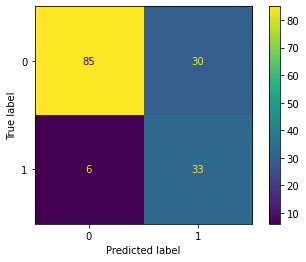

In [23]:
accuracy6=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list1[ac_list1.index(max(ac_list1))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb1 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb1.fit(X_train, y_train)
    y_pred = gb1.predict(X_test)
    
 
    accuracy6.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy6)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy6))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

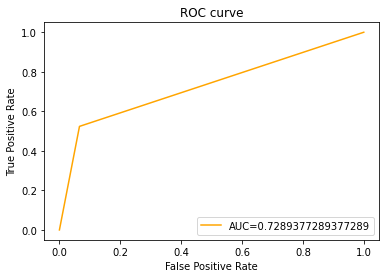

In [24]:
y_pred_proba = gb1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 50, 'max_features': 1, 'max_depth': 10, 'learning_rate': 1, 'criterion': 'squared_error'}

Mean cross-validated training accuracy score: 0.7604970914859862
Test accuracy: 77.27272727272727
Precision: 69.6969696969697
Recall: 47.91666666666667
F1 score: 56.790123456790134
AUC score: 0.6924135220125787
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 1, 'max_depth': 1, 'learning_rate': 1, 'criterion': 'friedman_mse'}

Mean cross-validated training accuracy score: 0.764013749338974
Test accuracy: 69.48051948051948
Precision: 56.52173913043478
Recall: 49.056603773584904
F1 score: 52.52525252525252
AUC score: 0.6462731178778255
-----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_

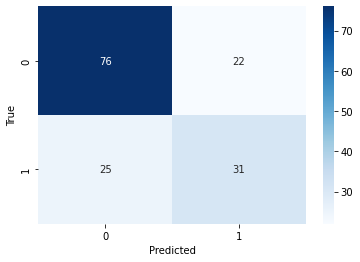

In [25]:
#-------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list2=[]
ac_list2=[]
# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'learning_rate':(0.01, 1),
                        'n_estimators':(50, 150),
                        'criterion':['friedman_mse', 'squared_error']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_1 = RandomizedSearchCV(gb, param_distributions=hyperparameter_space,n_iter=10, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_1.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_1.best_params_)
    best_params_list2.append(rs_1.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_1.best_score_)
    rs_1.best_estimator_.fit(X_train, y_train)
    y_pred = rs_1.best_estimator_.predict(X_test) # Predictions
    y_true = y_test # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list2.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-----------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 75.08441558441558
Precision: 57.717100081997266
Recall: 65.98014373175269
f1_score: 61.23514807546878
AUC: 0.7258005659533108
Standard deviation of accuracy:  0.02910803676280031
Standard deviation of precision:  0.06548676167369087
Standard deviation of recall:  0.07060349154535751
Standard deviation of f1_score:  0.05154550518183908
Standard deviation of AUC:  0.03612997730537498


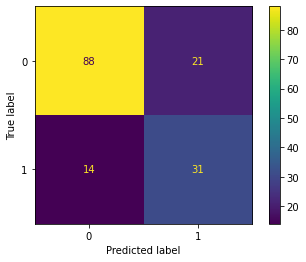

In [26]:
accuracy7=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list2[ac_list2.index(max(ac_list2))]
criterion=par['criterion']
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    gb2 = GradientBoostingClassifier(criterion= criterion, learning_rate= learning_rate, max_depth= max_depth, 
                                     max_features=max_features, n_estimators= n_estimators)
    gb2.fit(X_train, y_train)
    y_pred = gb2.predict(X_test)
    accuracy7.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy7)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy7))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

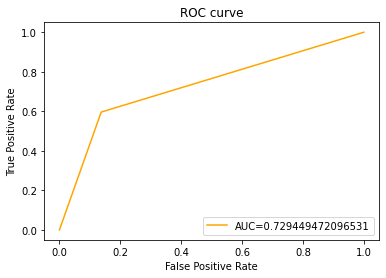

In [27]:
y_pred_proba = gb2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
#--------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]
row, col=X.shape

start = time.time()
params_gbm ={
    'max_depth':(1,10), 
    'max_features':(1,10),
    'learning_rate':(0.01, 1),
    'n_estimators':(50, 150)
}

# Gradient Boosting Machine
def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    
    model = gb
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f


training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
        
gbm_bo_1 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_1.maximize(init_points=10,n_iter=4)
        
        
print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_1.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)
        
end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.7013    | 0.3808    | 9.556     | 7.588     | 109.9     |
| 2         | 0.7013    | 0.1645    | 2.404     | 1.523     | 136.6     |
| 3         | 0.7013    | 0.6051    | 7.373     | 1.185     | 147.0     |
| 4         | 0.7013    | 0.8341    | 2.911     | 2.636     | 68.34     |
| 5         | 0.7013    | 0.3112    | 5.723     | 4.888     | 79.12     |
| 6         | 0.7013    | 0.6157    | 2.255     | 3.629     | 86.64     |
| 7         | 0.7013    | 0.4615    | 8.067     | 2.797     | 101.4     |
| 8         | 0.7013    | 0.5965    | 1.418     | 6.468     | 67.05     |
| 9         | 0.7013    | 0.0744    | 9.54      | 9.691     | 130.8     |
| 10        | 0.7013    | 0.3116    | 1.879     | 7.158     | 94.02     |
| 11        | 0.7013    | 0.5991    | 9.988     | 9.5       | 50.27     |
| 12        | 0.7013    | 0.4232    | 

Accuracy: 74.37012987012989
Precision: 57.795040997666334
Recall: 65.12080266450971
f1_score: 60.885169175259634
AUC: 0.7192337425009676
Standard deviation of accuracy:  0.028884770648495078
Standard deviation of precision:  0.06517145411198252
Standard deviation of recall:  0.0699842690557788
Standard deviation of f1_score:  0.05009942443498288
Standard deviation of AUC:  0.0355308026190961


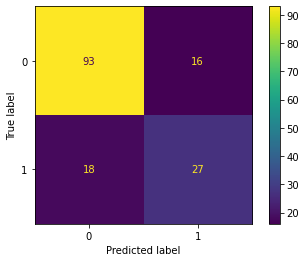

In [29]:
accuracy8=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
learning_rate=par['learning_rate']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    gb3 = GradientBoostingClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth, learning_rate=learning_rate)
    gb3.fit(X_train, y_train)
    y_pred = gb3.predict(X_test)
    
    accuracy8.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy8)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy8))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

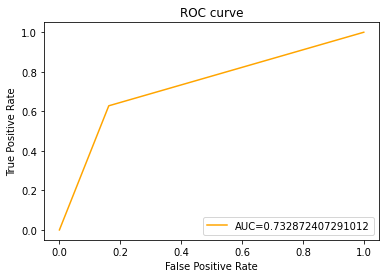

In [30]:
y_pred_proba = gb3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Random Forest Classifier

Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'n_estimators': 50}

Mean cross-validated training accuracy score: 0.7574563722897938
Test accuracy: 81.16883116883116
Precision: 83.33333333333334
Recall: 56.60377358490566
F1 score: 67.41573033707866
AUC score: 0.7533158976274984
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'n_estimators': 150}

Mean cross-validated training accuracy score: 0.7345848757271286
Test accuracy: 81.81818181818183
Precision: 76.08695652173914
Recall: 67.3076923076923
F1 score: 71.42857142857143
AUC score: 0.7826168929110106
----------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'n_estimators': 150

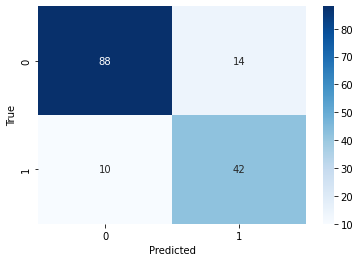

In [31]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list4=[]
ac_list4=[]   
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_2 = GridSearchCV(rf, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_2.best_params_)
    best_params_list4.append(gs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_2.best_score_)
    gs_2.best_estimator_.fit(X_train, y_train)
    y_pred = gs_2.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list4.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('----------------------------------------------------------------------------------------------------------------')
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 75.6883116883117
Precision: 54.06337971954126
Recall: 69.78664014899006
f1_score: 60.58432598254304
AUC: 0.7387888498325986
Standard deviation of accuracy:  0.030587298805479217
Standard deviation of precision:  0.06531834010660413
Standard deviation of recall:  0.06262360002169526
Standard deviation of f1_score:  0.04746950168171822
Standard deviation of AUC:  0.03220978216856794


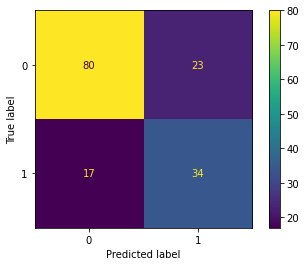

In [32]:
accuracy9=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list4[ac_list4.index(max(ac_list4))]
criterion=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rf1 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf1.fit(X_train, y_train)
    y_pred = rf1.predict(X_test)
    
    accuracy9.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy9)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy9))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

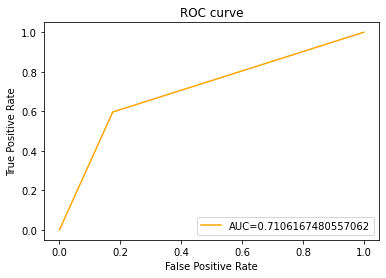

In [33]:
y_pred_proba = rf1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 1, 'max_depth': 10, 'criterion': 'entropy'}

Mean cross-validated training accuracy score: 0.7524854574299312
Test accuracy: 74.02597402597402
Precision: 74.4186046511628
Recall: 52.459016393442624
F1 score: 61.53846153846153
AUC score: 0.7031552970209767
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 150, 'max_features': 1, 'max_depth': 10, 'criterion': 'gini'}

Mean cross-validated training accuracy score: 0.7621893178212586
Test accuracy: 78.57142857142857
Precision: 76.92307692307693
Recall: 55.55555555555556
F1 score: 64.51612903225806
AUC score: 0.7327777777777779
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 50, 'max_features': 1, 'max_depth': 10, 'criterion': 'entr

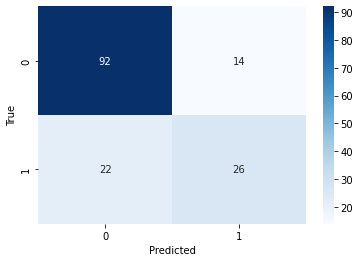

In [34]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list5=[]
ac_list5=[]
hyperparameter_space = {'max_depth':(1,10), 
                        'max_features':(1,10),
                        'n_estimators':(50, 150),
                        'criterion':['gini', 'entropy']}

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_2 = RandomizedSearchCV(rf, param_distributions=hyperparameter_space,scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_2.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_2.best_params_)
    best_params_list5.append(rs_2.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_2.best_score_)
    rs_2.best_estimator_.fit(X_train, y_train)
    y_pred = rs_2.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list5.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:",roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 75.77272727272727
Precision: 55.67017613138749
Recall: 69.17918057553402
f1_score: 61.34552199722212
AUC: 0.7382058370138533
Standard deviation of accuracy:  0.032900109259163375
Standard deviation of precision:  0.07039229870487257
Standard deviation of recall:  0.07445929383418412
Standard deviation of f1_score:  0.05593129932563232
Standard deviation of AUC:  0.03923866559483686


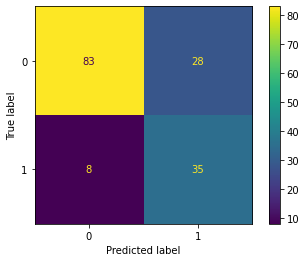

In [35]:
accuracy10=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list5[ac_list5.index(max(ac_list5))]
creation=par['criterion']
max_depth=par['max_depth']
max_features=par['max_features']
n_estimators=par['n_estimators']


for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf2 = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    rf2.fit(X_train, y_train)
    y_pred = rf2.predict(X_test)
    
    accuracy10.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy10)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy10))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

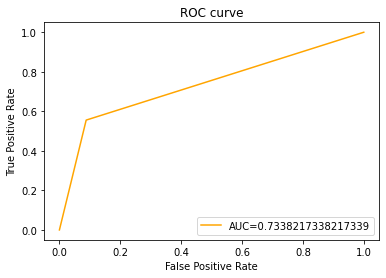

In [36]:
y_pred_proba = rf2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [40]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

params_gbm ={
    'max_depth':(1,10), 
    'max_features':(0,10),
    'n_estimators':(50, 150)
}

start = time.time()

def gbm_cl_bo(max_depth, max_features, n_estimators):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = rf
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f
   
training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]
    
# Run Bayesian Optimization

gbm_bo_2 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_2.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_2.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm['max_features'] = round(params_gbm['max_features'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
| 1         | 0.7532    | 4.371     | 9.507     | 123.2     |
| 2         | 0.7792    | 6.388     | 1.56      | 65.6      |
| 3         | 0.7597    | 1.523     | 8.662     | 110.1     |
| 4         | 0.7727    | 7.373     | 0.2058    | 147.0     |
| 5         | 0.7727    | 8.492     | 2.123     | 68.18     |
| 6         | 0.7727    | 2.651     | 3.042     | 102.5     |
| 7         | 0.7662    | 4.888     | 2.912     | 111.2     |
| 8         | 0.7792    | 2.255     | 2.921     | 86.64     |
| 9         | 0.7922    | 5.105     | 7.852     | 69.97     |
| 10        | 0.7727    | 5.628     | 5.924     | 54.65     |
| 11        | 0.7662    | 1.0       | 9.464     | 67.36     |
| 12        | 0.7922    | 5.19      | 7.455     | 70.81     |
| 13        | 0.7857    | 7.799     | 9.633     | 70.94     |
| 14        | 0.7532    | 3.893     | 10.0      | 74.05     |
Accuracy

Accuracy: 76.27272727272728
Precision: 58.740841497427496
Recall: 67.5742620463201
f1_score: 62.469149972099494
AUC: 0.7382703645577477
Standard deviation of accuracy:  0.0320572263619658
Standard deviation of precision:  0.07553279251709176
Standard deviation of recall:  0.07750544067641608
Standard deviation of f1_score:  0.05975205780166383
Standard deviation of AUC:  0.04030646634418025


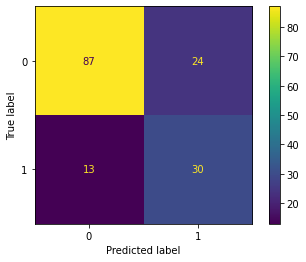

In [41]:
accuracy11=[]
precision=[]
recall=[]
f1score=[]
auc=[]


par=params_gbm
n_estimators=par['n_estimators']
max_features=par['max_features']
max_depth=par['max_depth']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    rf3 = RandomForestClassifier(n_estimators= n_estimators, max_features=max_features, max_depth= max_depth )
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)

    accuracy11.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy11)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy11))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

In [ ]:
y_pred_proba = rf3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## SVC

Optimal hyperparameter combination: {'C': 3, 'degree': 5}

Mean cross-validated training accuracy score: 0.7673188789000529
Test accuracy: 76.62337662337663
Precision: 67.56756756756756
Recall: 51.02040816326531
F1 score: 58.13953488372092
AUC score: 0.6979591836734693
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'degree': 5}

Mean cross-validated training accuracy score: 0.7590163934426231
Test accuracy: 72.07792207792207
Precision: 58.333333333333336
Recall: 54.90196078431373
F1 score: 56.565656565656575
AUC score: 0.6774224252807919
------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 3, 'degree': 5}

Mean cross-validated training accuracy score: 0.7622950819672131
Test accuracy: 76.62337662337663
Precision: 68.51851851851852
Recall: 66.07142857142857
F1 score: 67.27

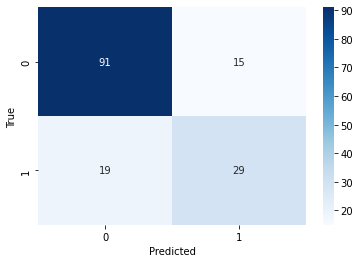

In [42]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list7=[]
ac_list7=[]
    
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_3 = GridSearchCV(sv, param_grid=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)

    gs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_3.best_params_)
    best_params_list7.append(gs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_3.best_score_)
    gs_3.best_estimator_.fit(X_train, y_train)
    y_pred = gs_3.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list7.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 76.01298701298703
Precision: 53.6826097908479
Recall: 70.48363302210423
f1_score: 60.65503194421332
AUC: 0.7425731583200988
Standard deviation of accuracy:  0.032888779808315574
Standard deviation of precision:  0.06806856375444897
Standard deviation of recall:  0.07095071548998416
Standard deviation of f1_score:  0.05697405537327095
Standard deviation of AUC:  0.038732359028289046


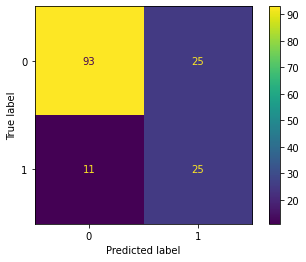

In [43]:
accuracy12=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list7[ac_list7.index(max(ac_list7))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv1 = SVC(C=C, degree=degree )
    sv1.fit(X_train, y_train)
    y_pred = sv1.predict(X_test)
    
    accuracy12.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy12)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy12))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

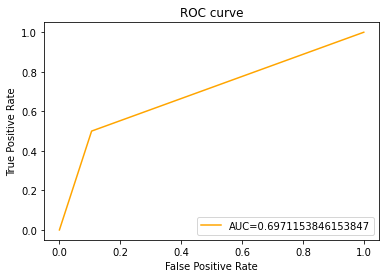

In [44]:
y_pred_proba = sv1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.7621364357482813
Test accuracy: 75.32467532467533
Precision: 56.75675675675676
Recall: 48.837209302325576
F1 score: 52.5
AUC score: 0.6721139744395559
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.7620571126388154
Test accuracy: 74.67532467532467
Precision: 75.67567567567568
Recall: 48.275862068965516
F1 score: 58.94736842105262
AUC score: 0.6945043103448276
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'degree': 5, 'C': 3}

Mean cross-validated training accuracy score: 0.7588841882601798
Test accuracy: 77.92207792207793
Precision: 64.44444444444444
Recall: 61.702127659574465
F1 score: 63.04347826086

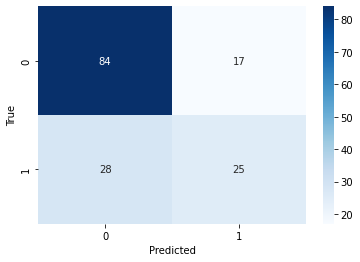

In [45]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list8=[]
ac_list8=[]
hyperparameter_space = {'C':(3,10), 
                        'degree':(5,20)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_3 = RandomizedSearchCV(sv, param_distributions=hyperparameter_space,scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    rs_3.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_3.best_params_)
    best_params_list8.append(rs_3.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_3.best_score_)
    rs_3.best_estimator_.fit(X_train, y_train)
    y_pred = rs_3.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list8.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 76.55844155844156
Precision: 54.97593304298476
Recall: 71.11386035747334
f1_score: 61.61474740548525
AUC: 0.7490555727940916
Standard deviation of accuracy:  0.032480648013398686
Standard deviation of precision:  0.07167124851846506
Standard deviation of recall:  0.07762744667085564
Standard deviation of f1_score:  0.057400082685557755
Standard deviation of AUC:  0.04005480538570305


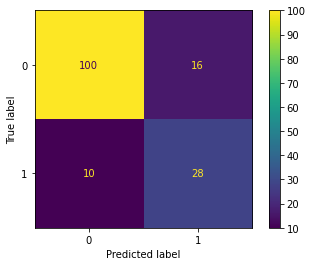

In [46]:
accuracy13=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list8[ac_list8.index(max(ac_list8))]
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    sv2 = SVC(C=C, degree=degree )
    sv2.fit(X_train, y_train)
    y_pred = sv2.predict(X_test)

    accuracy13.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy13)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy13))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

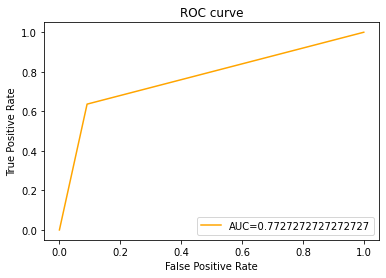

In [47]:
y_pred_proba = sv2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [48]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]


params_gbm ={
    'C':(3,10), 
    'degree':(5,20)
}

start = time.time()

def gbm_cl_bo(C, degree):
    params_gbm = {}
    params_gbm['C'] = round(C)
    params_gbm['degree'] = degree
   
    model = sv
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_3 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_3.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_3.max['params']
params_gbm['C'] = round(params_gbm['C'])
params_gbm['degree'] = round(params_gbm['degree'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     |  degree   |
-------------------------------------------------
| 1         | 0.7468    | 5.622     | 19.26     |
| 2         | 0.7468    | 8.124     | 13.98     |
| 3         | 0.7468    | 4.092     | 7.34      |
| 4         | 0.7468    | 3.407     | 17.99     |
| 5         | 0.7468    | 7.208     | 15.62     |
| 6         | 0.7468    | 3.144     | 19.55     |
| 7         | 0.7468    | 8.827     | 8.185     |
| 8         | 0.7468    | 4.273     | 7.751     |
| 9         | 0.7468    | 5.13      | 12.87     |
| 10        | 0.7468    | 6.024     | 9.368     |
| 11        | 0.7468    | 7.711     | 12.96     |
| 12        | 0.7468    | 8.799     | 9.504     |
| 13        | 0.7468    | 3.71      | 12.83     |
| 14        | 0.7468    | 3.04      | 11.96     |
Accuracy: 74.67532467532467
Precision: 68.57142857142857
F1-Score: 55.17241379310346
Recall: 46.15384615384615
AUC: 0.6768476621417798
Best hyperparameters:
{'C': 6, 'degree': 19}
Execution time of Ba

Accuracy: 75.44155844155844
Precision: 53.83498400585695
Recall: 70.47710269143896
f1_score: 60.63480203287007
AUC: 0.739553859435112
Standard deviation of accuracy:  0.03349902852369647
Standard deviation of precision:  0.07527088645762138
Standard deviation of recall:  0.07151518884831377
Standard deviation of f1_score:  0.05884903136799003
Standard deviation of AUC:  0.03756951568818137


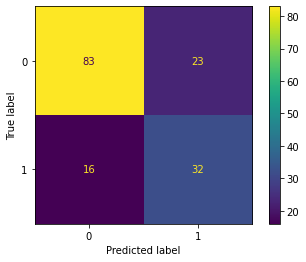

In [49]:
accuracy14=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
degree=par['degree']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    sv3 = SVC(C=C, degree=degree )
    sv3.fit(X_train, y_train)
    y_pred = sv3.predict(X_test)

    accuracy14.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy14)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy14))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

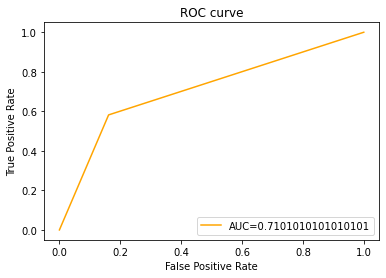

In [50]:
y_pred_proba = sv3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Ada Boost Classifier

Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.7542834479111582
Test accuracy: 78.57142857142857
Precision: 67.79661016949152
Recall: 74.07407407407408
F1 score: 70.79646017699113
AUC score: 0.7753703703703705
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.742702273929138
Test accuracy: 72.72727272727273
Precision: 63.46153846153846
Recall: 58.92857142857143
F1 score: 61.11111111111111
AUC score: 0.6977040816326531
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'algorithm': 'SAMME.R', 'n_estimators': 10}

Mean cross-validated training accuracy score: 0.7621893178212586
Test accuracy: 69.48051948051948
P

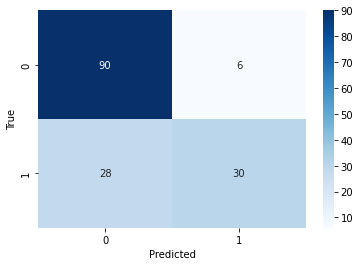

In [51]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list10=[]
ac_list10=[]
   
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_4 = GridSearchCV(ab, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_4.best_params_)
    best_params_list10.append(gs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_4.best_score_)
    gs_4.best_estimator_.fit(X_train, y_train)
    y_pred = gs_4.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list10.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 74.6948051948052
Precision: 55.89865119384978
Recall: 66.06472809373666
f1_score: 60.153663596405984
AUC: 0.7226741160648947
Standard deviation of accuracy:  0.03420455125251319
Standard deviation of precision:  0.07605101004331093
Standard deviation of recall:  0.06649316697836857
Standard deviation of f1_score:  0.05382177826214247
Standard deviation of AUC:  0.037990472161800605


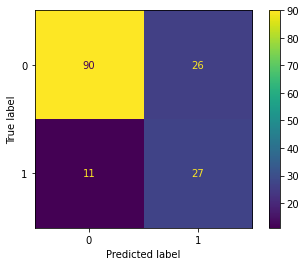

In [52]:
accuracy15=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list10[ac_list10.index(max(ac_list10))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab1 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab1.fit(X_train, y_train)
    y_pred = ab1.predict(X_test)
    
    accuracy15.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy15)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy15))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

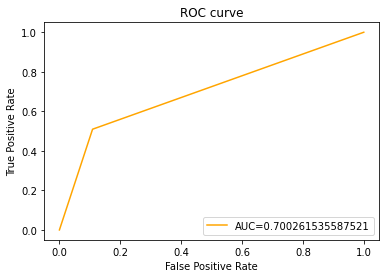

In [53]:
y_pred_proba = ab1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.7542834479111581
Test accuracy: 73.37662337662337
Precision: 54.347826086956516
Recall: 55.55555555555556
F1 score: 54.94505494505495
AUC score: 0.6814475025484201
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.7507403490216816
Test accuracy: 69.48051948051948
Precision: 73.17073170731707
Recall: 45.45454545454545
F1 score: 56.074766355140184
AUC score: 0.6647727272727273
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'n_estimators': 10, 'algorithm': 'SAMME'}

Mean cross-validated training accuracy score: 0.7458751983077736
Test accuracy: 77.92207792207793
Prec

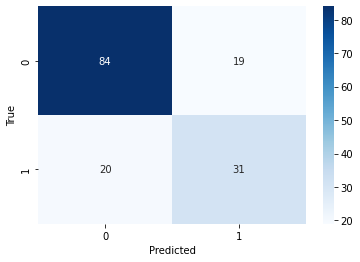

In [54]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list11=[]
ac_list11=[]
hyperparameter_space = {'n_estimators':(3,10), 
                        'algorithm':['SAMME', 'SAMME.R']}

row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    rs_4 = RandomizedSearchCV(ab, param_distributions=hyperparameter_space,
                            scoring="accuracy",
                            n_jobs=-1, cv=10, return_train_score=True)

    rs_4.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_4.best_params_)
    best_params_list11.append(rs_4.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_4.best_score_)
    rs_4.best_estimator_.fit(X_train, y_train)
    y_pred = rs_4.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list11.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 74.65584415584416
Precision: 55.90722136114758
Recall: 66.68484377184024
f1_score: 60.370699195955126
AUC: 0.7243843808004319
Standard deviation of accuracy:  0.034104789688042446
Standard deviation of precision:  0.08204348647876249
Standard deviation of recall:  0.06645103799545961
Standard deviation of f1_score:  0.05779497323634919
Standard deviation of AUC:  0.03819882414518501


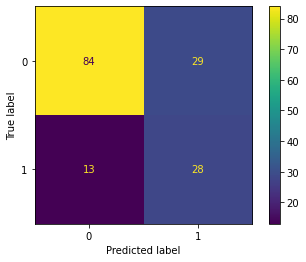

In [55]:
accuracy16=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list11[ac_list11.index(max(ac_list11))]
algorithm=par['algorithm']
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab2 = AdaBoostClassifier(algorithm= algorithm, n_estimators=n_estimators )
    ab2.fit(X_train, y_train)
    y_pred = ab2.predict(X_test)
    accuracy16.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy16)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy16))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

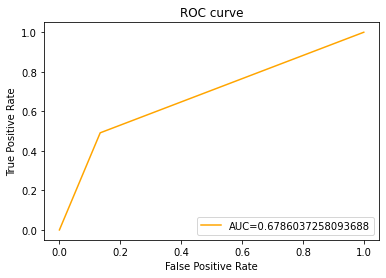

In [56]:
y_pred_proba = ab2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [57]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()

params_gbm ={
    'n_estimators':(3,10)
}

def gbm_cl_bo(n_estimators):
    params_gbm = {}
    params_gbm['n_estimators'] = round(n_estimators)
   
    model = ab
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_4 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_4.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])


params_gbm = gbm_bo_4.max['params']
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.7208    | 5.622     |
| 2         | 0.7208    | 9.655     |
| 3         | 0.7208    | 8.124     |
| 4         | 0.7208    | 7.191     |
| 5         | 0.7208    | 4.092     |
| 6         | 0.7208    | 4.092     |
| 7         | 0.7208    | 3.407     |
| 8         | 0.7208    | 9.063     |
| 9         | 0.7208    | 7.208     |
| 10        | 0.7208    | 7.957     |
| 11        | 0.7208    | 3.0       |
| 12        | 0.7208    | 3.752     |
| 13        | 0.7208    | 5.349     |
| 14        | 0.7208    | 5.098     |
Accuracy: 72.07792207792207
Precision: 61.224489795918366
F1-Score: 58.25242718446603
Recall: 55.55555555555556
AUC: 0.6827777777777778
Best hyperparameters:
{'n_estimators': 6}
Execution time of Bayesian Optimization (in Seconds): 3.84188175201416


Accuracy: 74.31818181818183
Precision: 56.803680355121344
Recall: 66.01593369117685
f1_score: 60.581355571617344
AUC: 0.7209648876126613
Standard deviation of accuracy:  0.030865293060529347
Standard deviation of precision:  0.08480952082454712
Standard deviation of recall:  0.061195583988743196
Standard deviation of f1_score:  0.056480964210996805
Standard deviation of AUC:  0.033443988512844636


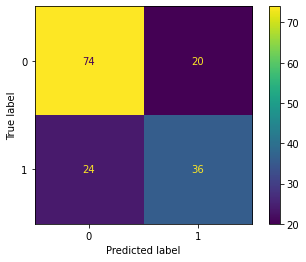

In [58]:
accuracy17=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
n_estimators=par['n_estimators']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    ab3 = AdaBoostClassifier( n_estimators= n_estimators )
    ab3.fit(X_train, y_train)
    y_pred = ab3.predict(X_test)

    accuracy17.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy17)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy17))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

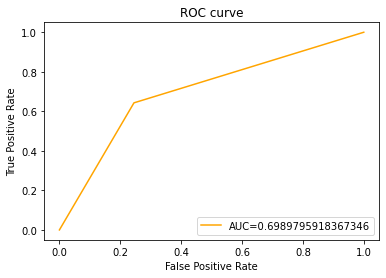

In [59]:
y_pred_proba = ab3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression

Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.7555261766261238
Test accuracy: 81.16883116883116
Precision: 78.72340425531915
Recall: 66.07142857142857
F1 score: 71.84466019417476
AUC score: 0.7793367346938775
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.7738498149127444
Test accuracy: 75.97402597402598
Precision: 77.77777777777779
Recall: 56.451612903225815
F1 score: 65.42056074766356
AUC score: 0.7279102384291725
-------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

Mean cross-validated training accuracy score: 0.7818878900052881
Test accur

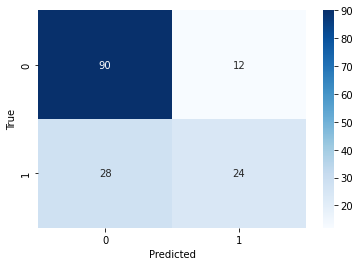

In [60]:
#------------------------------------------------------GridSearchCV--------------------------------------------------------#

start = time.time()
best_params_list13=[]
ac_list13=[]   
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    gs_5 = GridSearchCV(lg, param_grid=hyperparameter_space, scoring="accuracy", n_jobs=-1, cv=10, return_train_score=True)

    gs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", gs_5.best_params_)
    best_params_list13.append(gs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",gs_5.best_score_)
    gs_5.best_estimator_.fit(X_train, y_train)
    y_pred = gs_5.best_estimator_.predict(X_test)       # Predictions
    y_true = y_test                                   # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list13.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('-------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print("Confusion Matrix:")
print()

Accuracy: 77.27272727272727
Precision: 57.68211911802227
Recall: 71.52166178608265
f1_score: 63.6160554527603
AUC: 0.7554543834679482
Standard deviation of accuracy:  0.0343107886955956
Standard deviation of precision:  0.06610653090691328
Standard deviation of recall:  0.06558070200080324
Standard deviation of f1_score:  0.05481857257608232
Standard deviation of AUC:  0.03889311173473177


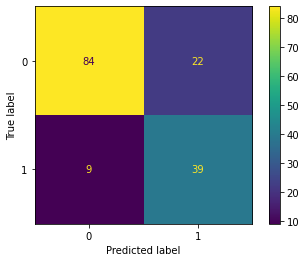

In [61]:
accuracy18=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list13[ac_list13.index(max(ac_list13))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr1 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr1.fit(X_train, y_train)
    y_pred = lr1.predict(X_test)
    
    accuracy18.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy18)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy18))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

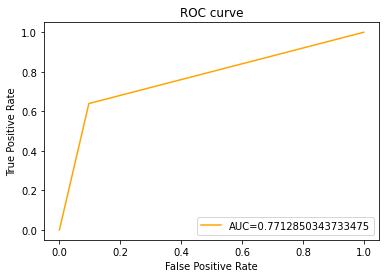

In [62]:
y_pred_proba = lr1.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.770386039132734
Test accuracy: 76.62337662337663
Precision: 71.69811320754717
Recall: 64.40677966101694
F1 score: 67.85714285714285
AUC score: 0.7430865298840321
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.7771020624008461
Test accuracy: 72.72727272727273
Precision: 63.63636363636363
Recall: 51.85185185185185
F1 score: 57.14285714285714
AUC score: 0.6792592592592592
--------------------------------------------------------------------------------------------------------------------
Optimal hyperparameter combination: {'max_iter': 500, 'intercept_scaling': 1.0, 'C': 10}

Mean cross-validated training accuracy score: 0.7687202538339503
Test accur

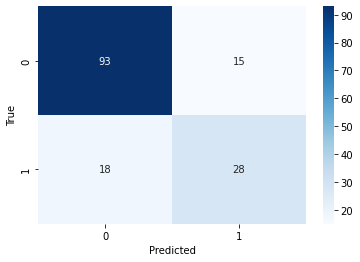

In [63]:
#----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
start = time.time()
best_params_list14=[]
ac_list14=[]
hyperparameter_space = {'max_iter':(500,1000), 
                        'C':(0.1, 10),
                        'intercept_scaling':(1.0,3.0)}

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
row, col=X.shape
for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    rs_5 = RandomizedSearchCV(lg, param_distributions=hyperparameter_space, scoring="accuracy",n_jobs=-1, cv=10, return_train_score=True)
    rs_5.fit(X_train, y_train)
    print("Optimal hyperparameter combination:", rs_5.best_params_)
    best_params_list14.append(rs_5.best_params_)
    print()
    print("Mean cross-validated training accuracy score:",rs_5.best_score_)
    rs_5.best_estimator_.fit(X_train, y_train)
    y_pred = rs_5.best_estimator_.predict(X_test)     # Predictions
    y_true = y_test                                 # True values

    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list14.append(A)
    print("Precision:", precision_score(y_true, y_pred)*100)
    print("Recall:",recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('--------------------------------------------------------------------------------------------------------------------')

cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print("Confusion matrix:")
print()

Accuracy: 76.67532467532469
Precision: 54.742137398571025
Recall: 71.91284822048074
f1_score: 61.86728284687888
AUC: 0.7520737003211844
Standard deviation of accuracy:  0.027668092440809616
Standard deviation of precision:  0.0648643436370118
Standard deviation of recall:  0.06893332698143304
Standard deviation of f1_score:  0.052304597189927
Standard deviation of AUC:  0.03613296058606781


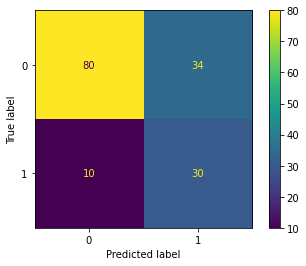

In [64]:
accuracy19=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=best_params_list14[ac_list14.index(max(ac_list14))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr2 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr2.fit(X_train, y_train)
    y_pred = lr2.predict(X_test)
    
    accuracy19.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy19)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy19))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

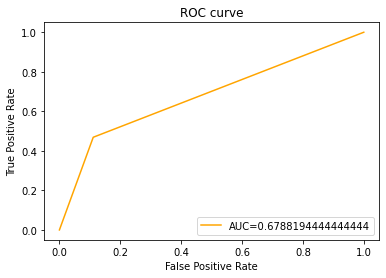

In [65]:
y_pred_proba = lr2.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [66]:
#---------------------------------------------------Bayesian Optimization--------------------------------------------------#
l=[]

start = time.time()
params_gbm ={
    'max_iter':(500,1000), 
    'C':(0.1, 10),
    'intercept_scaling':(1.0,3.0)
}

# LogisticRegression Machine
def gbm_cl_bo(max_iter, C, intercept_scaling):
    params_gbm = {}
    params_gbm['max_iter'] = round(max_iter)
    params_gbm['C'] = C
    params_gbm['intercept_scaling'] = intercept_scaling
    
    model = lg
    model.fit(X_train, y_train)
    y_score = model.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l.insert(0,(f*100))
    l.insert(1,(precision_score(y_test, y_score)*100))
    l.insert(2,(f1_score(y_test, y_score)*100))
    l.insert(3,(recall_score(y_test, y_score)*100))
    l.insert(4,(roc_auc_score(y_test, y_score)*100))
    return f

# Run Bayesian Optimization

training_indices= random.sample([i for i in range(row)], int(row*0.8))
test_indices=list(set([i for i in range(row)])-set(training_indices))
X_train=X.iloc[training_indices]
X_test=X.iloc[test_indices]
y_train=y[training_indices]
y_test=y[test_indices]

gbm_bo_5 = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=42)
gbm_bo_5.maximize(init_points=10, n_iter=4)

print("Accuracy:", l[0])
print("Precision:", l[1])
print("F1-Score:" ,l[2])
print("Recall:",l[3])
print("AUC:",l[4])

params_gbm = gbm_bo_5.max['params']
params_gbm['max_iter'] = round(params_gbm['max_iter'])
params_gbm['C'] = round(params_gbm['C'])
params_gbm['intercept_scaling'] = round(params_gbm['intercept_scaling'])
print('Best hyperparameters:')
print(params_gbm)

end = time.time()
diff = end - start
print('Execution time of Bayesian Optimization (in Seconds):', diff)

|   iter    |  target   |     C     | interc... | max_iter  |
-------------------------------------------------------------
| 1         | 0.7597    | 3.808     | 2.901     | 866.0     |
| 2         | 0.7597    | 6.027     | 1.312     | 578.0     |
| 3         | 0.7597    | 0.675     | 2.732     | 800.6     |
| 4         | 0.7597    | 7.11      | 1.041     | 985.0     |
| 5         | 0.7597    | 8.341     | 1.425     | 590.9     |
| 6         | 0.7597    | 1.916     | 1.608     | 762.4     |
| 7         | 0.7597    | 4.376     | 1.582     | 805.9     |
| 8         | 0.7597    | 1.481     | 1.584     | 683.2     |
| 9         | 0.7597    | 4.615     | 2.57      | 599.8     |
| 10        | 0.7597    | 5.191     | 2.185     | 523.2     |
| 11        | 0.7597    | 9.716     | 2.265     | 992.9     |
| 12        | 0.7597    | 1.692     | 1.798     | 543.3     |
| 13        | 0.7597    | 1.002     | 2.004     | 999.4     |
| 14        | 0.7597    | 9.176     | 1.148     | 999.6     |
Accuracy

Accuracy: 76.62337662337663
Precision: 54.735970079635855
Recall: 73.2103661772172
f1_score: 62.59079614917006
AUC: 0.7551798321603032
Standard deviation of accuracy:  0.03955772052488544
Standard deviation of precision:  0.06258244205108918
Standard deviation of recall:  0.061741195390076734
Standard deviation of f1_score:  0.061135528522095535
Standard deviation of AUC:  0.045144375186461


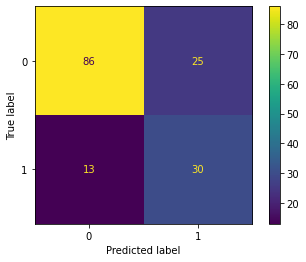

In [67]:
accuracy20=[]
precision=[]
recall=[]
f1score=[]
auc=[]

par=params_gbm
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    lr3 = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    lr3.fit(X_train, y_train)
    y_pred = lr3.predict(X_test)
    
    accuracy20.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy20)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy20))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

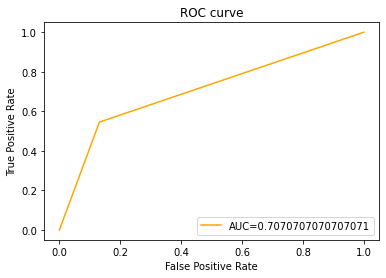

In [68]:
y_pred_proba = lr3.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Neural Network Model

8/8 [==============================] - 0s 2ms/step
Accuracy: 66.70572916666667
Precision: 22.983174568335215
Recall: 51.465636048944475
f1_score: 27.648157150102808
AUC: 0.6461573384760022
Standard deviation of accuracy:  0.021874118029223344
Standard deviation of precision:  0.1947739841370916
Standard deviation of recall:  0.2669565807978312
Standard deviation of f1_score:  0.1978161165221059


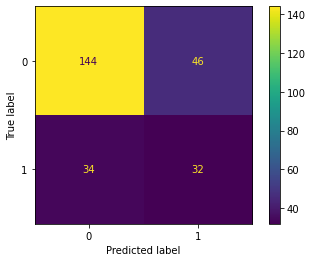

In [69]:
nnaccuracy=[]
nnprecision=[]
nnrecall=[]
nnf1score=[]
nnauc=[]

def NeuralNet():
    model = Sequential()
    model.add(Dense(61, input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=1)
for train_index, test_index in cv.split(X,y_label):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_label[train_index], y_label[test_index]
    
    nn = KerasClassifier(build_fn=NeuralNet)   #create the NN model
    nn.fit(X_train, y_train)                   #train the model
    y_pred = nn.predict(X_test)                  # Predictions
    
    nnaccuracy.append(accuracy_score(y_pred, y_test))
    nnprecision.append(precision_score(y_pred, y_test))
    nnrecall.append(recall_score(y_pred, y_test))
    nnf1score.append(f1_score(y_pred, y_test))
    try:
        nnauc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval=['0','1']
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()
    
print('Accuracy:', np.mean(nnaccuracy)*100)
print('Precision:', np.mean(nnprecision)*100)
print('Recall:', np.mean(nnrecall)*100)
print('f1_score:', np.mean(nnf1score)*100)
print('AUC:',np.mean(nnauc))

print('Standard deviation of accuracy: ', statistics.stdev(nnaccuracy))
print('Standard deviation of precision: ', statistics.stdev(nnprecision))
print('Standard deviation of recall: ', statistics.stdev(nnrecall))
print('Standard deviation of f1_score: ', statistics.stdev(nnf1score))

8/8 [==============================] - 0s 2ms/step


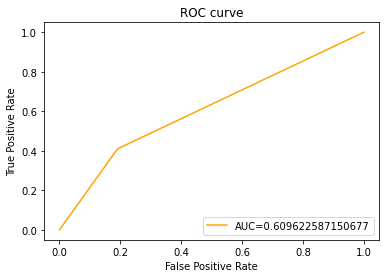

In [70]:
y_pred_proba = nn.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Hyperparameter Tuning of neural network model

In [71]:
LeakyReLU = LeakyReLU(alpha=0.1)
pd.set_option("display.max_columns", None)
score_acc = make_scorer(accuracy_score)

In [72]:
#-----------------------------------------------------Bayesian Optimization--------------------------------------------------#
row, col=X.shape
l=[]
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
l.append([])
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=8, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]
    
    nm = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    model1 = nm
    model1.fit(X_train, y_train)
    y_score = model1.predict(X_test)
    f = accuracy_score(y_test, y_score)
    l[1].append(accuracy_score(y_test, y_score)*100)
    l[2].append(precision_score(y_test, y_score)*100)
    l[3].append(f1_score(y_test, y_score)*100)
    l[4].append(recall_score(y_test, y_score)*100)
    l[5].append(roc_auc_score(y_test, y_score)*100)
    l[0].append(f)
    return l[0][0]

params_nn2 ={
    'neurons': (1, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.001, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=42)
nn_bo.maximize(init_points=10, n_iter=4)
start = time.time()

params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['dropout'] = round(params_nn_['dropout'])
params_nn_['dropout_rate'] = round(params_nn_['normalization'])
params_nn_['normalization'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]

print("Accuracy:", np.mean(l[1]))
print("Precision:", np.mean(l[2]))
print("F1-Score:" , np.mean(l[3]))
print("Recall:", np.mean(l[4])) 
print("AUC:", np.mean(l[5])) 
print('It takes %s minutes' % ((time.time() - start)/60))
print('-----------------------------------')
print('Best hyperparameters:')
params_nn_

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.7662    | 3.371     | 960.6     | 0.732     | 0.1796    | 32.48     | 1.312     | 1.116     | 0.8663    | 60.51     | 0.7081    | 0.1441    |
| 2         | 0.7662    | 8.729     | 866.0     | 0.2123    | 0.05455   | 34.67     | 1.608     | 2.05      | 0.4325    | 29.83     | 0.6119    | 0.9765    |
| 3         | 0.7662    | 2.629     | 493.1     | 0.4561    | 0.2356    | 35.97     | 2.028     | 2.185     | 0.0474    | 61.15     | 0.1705    | 0.4554    |
| 4         | 0.7662    | 8.54      | 972.5     | 0.8084    | 0.09138   | 27.81     | 2.368     | 1.88      | 0.1229    | 50.02     | 0.03439   | 6.365     |
| 5         | 0.7662    | 2.329     | 730.0     | 0.

{'activation': 'softsign',
 'batch_size': 961,
 'dropout': 1,
 'dropout_rate': 1,
 'epochs': 32,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.8663099696291603,
 'neurons': 61,
 'normalization': 1,
 'optimizer': <keras.optimizers.legacy.adam.Adam at 0x284693cdbb0>}

5/5 [==============================] - 0s 2ms/step
Accuracy: 66.97402597402598
Precision: 19.41083560697679
Recall: 53.11488019060116
f1_score: 24.028712187935632
AUC: 0.6364109294358176
Standard deviation of accuracy:  0.0335833451104739
Standard deviation of precision:  0.1924809226155704
Standard deviation of recall:  0.2763076900564789
Standard deviation of f1_score:  0.1879494927358749
Standard deviation of AUC:  0.11830240590981149


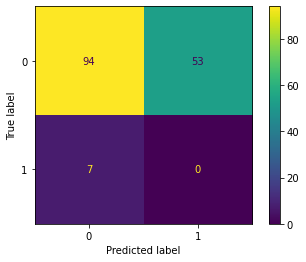

In [73]:
accuracy21=[]
precision=[]
recall=[]
f1score=[]
auc=[]

def NeuralNetbayesian():
    par=params_nn_
    activation=par['activation']
    batch_size=par['batch_size']
    dropout=par['dropout']
    dropout_rate=par['dropout_rate']
    epochs=par['epochs']
    layers1=par['layers1']
    layers2=par['layers2']
    learning_rate=par['learning_rate']
    neurons=par['neurons']
    normalization=par['normalization']
    optimizer=par['optimizer']

    model = Sequential()
    model.add(Dense(61, input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kb = KerasClassifier(build_fn=NeuralNetbayesian)
    kb.fit(X_train, y_train)
    y_pred = kb.predict(X_test)
    
    accuracy21.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy21)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy21))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

5/5 [==============================] - 0s 3ms/step


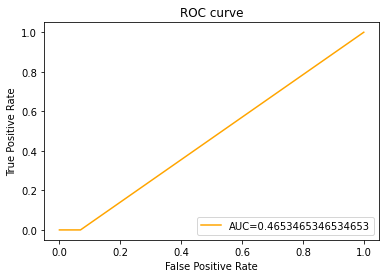

In [74]:
y_pred_proba = kb.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [75]:
#----------------------------------------------------------GridSearchCV-----------------------------------------------------#
# Function to create model
row,col=X.shape
best_params_list15=[]
ac_list15=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(61, input_shape=(8,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size=(200, 1000)
epochs=(20, 100)
learn_rate=(0.001, 1)
optimizer=(0,7)
activation=(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate=(0,0.3) 
neurons=(1, 100)

start = time.time()

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    best_params_list15.append(grid_result.best_params_)
    
    y_pred = grid.best_estimator_.predict(X_test)                                 # Predictions
    y_true = y_test                                                               # True values
    
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list15.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')
    
print('It takes %s minutes' % ((time.time() - start)/60))
print()

Best: 0.697162 using {'batch_size': 200, 'epochs': 100, 'optimizer': 7, 'optimizer__activation': 0, 'optimizer__dropout_rate': 0.3, 'optimizer__learning_rate': 1, 'optimizer__neurons': 100, 'optimizer__weight_constraint': 1.0}
Test accuracy: 77.92207792207793
Precision: 77.77777777777779
Recall: 42.857142857142854
F1 score: 55.26315789473685
AUC score: 0.6857142857142857
------------------------------------------------------------------------------------------------------------------
Best: 0.688865 using {'batch_size': 200, 'epochs': 100, 'optimizer': 7, 'optimizer__activation': 9, 'optimizer__dropout_rate': 0.3, 'optimizer__learning_rate': 0.001, 'optimizer__neurons': 1, 'optimizer__weight_constraint': 1.0}
Test accuracy: 67.53246753246754
Precision: 50.0
Recall: 26.0
F1 score: 34.21052631578947
AUC score: 0.5675
------------------------------------------------------------------------------------------------------------------
Best: 0.703619 using {'batch_size': 1000, 'epochs': 100, 'o

5/5 [==============================] - 0s 2ms/step
Accuracy: 66.27922077922076
Precision: 15.334463981645388
Recall: 49.38773139001555
f1_score: 20.996301526990262
AUC: 0.6234753940646314
Standard deviation of accuracy:  0.0415762190593835
Standard deviation of precision:  0.15384316354862215
Standard deviation of recall:  0.27611556509876395
Standard deviation of f1_score:  0.17852253401393317
Standard deviation of AUC:  0.11435115462613862


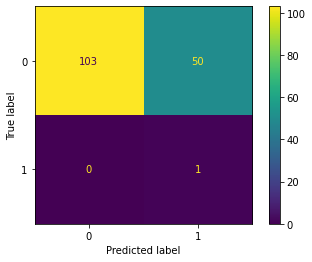

In [76]:
accuracy22=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetgrid():
    par=best_params_list15[ac_list15.index(max(ac_list15))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(61, input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kg = KerasClassifier(build_fn=NeuralNetgrid)
    kg.fit(X_train, y_train)
    y_pred = kg.predict(X_test)
    
    accuracy22.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass

listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy22)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy22))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

5/5 [==============================] - 0s 2ms/step


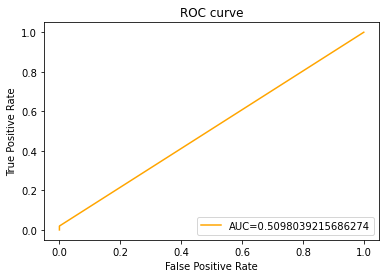

In [77]:
y_pred_proba = kg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [78]:
#-----------------------------------------------------RandomizedSearchCV-----------------------------------------------------#
# Function to create model
best_params_list16=[]
ac_list16=[]

def create_model():
 # create model
    model = Sequential()
    model.add(Dense(61, input_shape=(8,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
 # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the random search parameters
batch_size:(200, 1000)
epochs:(20, 100)
learn_rate:(0.001, 1)
optimizer:(0,7)
activation:(0, 9)
weight_constraint = (1.0, 2.0)
dropout_rate:(0,0.3) 
neurons: (1, 100)

start = time.time()
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer__learning_rate=learn_rate, optimizer=optimizer, optimizer__activation=activation,
                optimizer__dropout_rate=dropout_rate, optimizer__weight_constraint=weight_constraint, optimizer__neurons=neurons)

for i in range(10):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y_label[training_indices]
    y_test=y_label[test_indices]
    rndm = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
    rndm_result = rndm.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (rndm_result.best_score_, rndm_result.best_params_))
    means = rndm_result.cv_results_['mean_test_score']
    stds = rndm_result.cv_results_['std_test_score']
    params = rndm_result.cv_results_['params']
    best_params_list16.append(rndm_result.best_params_)
    
    y_pred = rndm.best_estimator_.predict(X_test)  # Predictions
    y_true = y_test                                # True values
    A=accuracy_score(y_true, y_pred)*100
    print("Test accuracy:",A)
    ac_list16.append(A)
    print("Precision:",precision_score(y_true, y_pred)*100)
    print("Recall:", recall_score(y_true, y_pred)*100)
    print("F1 score:", f1_score(y_true, y_pred)*100)
    print("AUC score:", roc_auc_score(y_true, y_pred))
    print('------------------------------------------------------------------------------------------------------------------')

print('It takes %s minutes' % ((time.time() - start)/60))

Best: 0.688985 using {'optimizer__weight_constraint': 2.0, 'optimizer__neurons': 1, 'optimizer__learning_rate': 0.001, 'optimizer__dropout_rate': 0.3, 'optimizer__activation': 0, 'optimizer': 7, 'epochs': 100, 'batch_size': 200}
Test accuracy: 70.77922077922078
Precision: 68.18181818181817
Recall: 28.30188679245283
F1 score: 40.0
AUC score: 0.6068559686157294
------------------------------------------------------------------------------------------------------------------
Best: 0.705149 using {'optimizer__weight_constraint': 2.0, 'optimizer__neurons': 1, 'optimizer__learning_rate': 0.001, 'optimizer__dropout_rate': 0.3, 'optimizer__activation': 0, 'optimizer': 0, 'epochs': 100, 'batch_size': 1000}
Test accuracy: 65.5844155844156
Precision: 61.111111111111114
Recall: 19.298245614035086
F1 score: 29.333333333333332
AUC score: 0.5604087538433713
------------------------------------------------------------------------------------------------------------------
Best: 0.680791 using {'optimiz

5/5 [==============================] - 0s 2ms/step
Accuracy: 66.40259740259741
Precision: 18.72565531245812
Recall: 51.75422444208589
f1_score: 23.01657366716614
AUC: 0.6403785235444723
Standard deviation of accuracy:  0.03558579440446944
Standard deviation of precision:  0.20020648320588688
Standard deviation of recall:  0.31554675781232294
Standard deviation of f1_score:  0.20374958389720343
Standard deviation of AUC:  0.13301361189154418


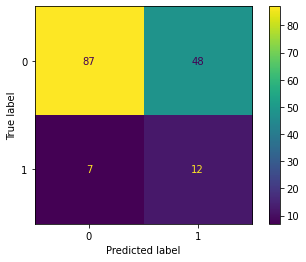

In [79]:
accuracy23=[]
precision=[]
recall=[]
f1score=[]
auc=[]


def NeuralNetrandom():
    par=best_params_list16[ac_list16.index(max(ac_list16))]
    batch_size=par['batch_size']
    epochs=par['epochs']
    optimizer=par['optimizer']
    optimizer__activation=par['optimizer__activation']
    optimizer__dropout_rate=par['optimizer__dropout_rate']
    optimizer__learning_rate=par['optimizer__learning_rate']
    optimizer__neurons=par['optimizer__neurons']
    optimizer__weight_constraint=par['optimizer__weight_constraint']

    model = Sequential()
    model.add(Dense(61, input_shape=(8,)))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

for i in range(100):
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train=X.iloc[training_indices]
    X_test=X.iloc[test_indices]
    y_train=y[training_indices]
    y_test=y[test_indices]

    kr = KerasClassifier(build_fn=NeuralNetrandom)
    kr.fit(X_train, y_train)
    y_pred = kr.predict(X_test)
    
    accuracy23.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    try:
        auc.append(roc_auc_score(y_pred, y_test))
    except ValueError:
        pass
    
listval='0','1'
cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()  

print('Accuracy:', np.mean(accuracy23)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy23))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

5/5 [==============================] - 0s 2ms/step


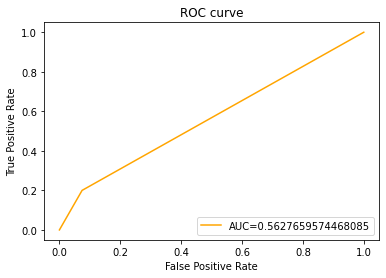

In [80]:
y_pred_proba = kr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## WILCOXON SIGNED RANK TEST

In [86]:
#-----------------------------------------------WILCOXON SIGNED RANK TEST------------------------------------------------------#
import random
ac_sv=[]
ac_rf=[]
ac_ab=[]
ac_gb=[]
ac_lg=[]
ac_nn=[]
row, col=X.shape

for i in range(5000):
    print(i)
    
    training_indices= random.sample([i for i in range(row)], int(row*0.8))
    test_indices=list(set([i for i in range(row)])-set(training_indices))
    X_train_1=X.iloc[training_indices]
    X_test_1=X.iloc[test_indices]
    y_train_1=y[training_indices]
    y_test_1=y[test_indices]
    
    
    sv2.fit(X_train_1, y_train_1)
    pred1= sv2.predict(X_test_1)
    ac_sv.append(accuracy_score(y_test_1, pred1))
    
    rf3.fit(X_train_1, y_train_1)
    pred2= rf3.predict(X_test_1)
    ac_rf.append(accuracy_score(y_test_1, pred2))
    
    ab1.fit(X_train_1, y_train_1)
    pred3= ab1.predict(X_test_1)
    ac_ab.append(accuracy_score(y_test_1, pred3))
    
    gb.fit(X_train_1, y_train_1)
    pred4= gb.predict(X_test_1)
    ac_gb.append(accuracy_score(y_test_1, pred4))
    
    lr1.fit(X_train_1, y_train_1)
    pred5= lr1.predict(X_test_1)
    ac_lg.append(accuracy_score(y_test_1, pred5))
    
    kb.fit(X_train_1, y_train_1)
    pred6= kb.predict(X_test_1)
    ac_nn.append(accuracy_score(y_test_1, pred6))
    
alpha=0.05
stat,w1=stats.wilcoxon(ac_sv, ac_lg, zero_method='zsplit')
print(w1)
if(w1<alpha):
    print("reject null hypothesis-1")
stat,w2=stats.wilcoxon(ac_rf, ac_lg, zero_method='zsplit')
print(w2)
if(w2<alpha):
    print("reject null hypothesis-2")
stat,w3=stats.wilcoxon(ac_gb, ac_lg, zero_method='zsplit')
print(w3)
if(w3<alpha):
    print("reject null hypothesis-3")
stat,w4=stats.wilcoxon(ac_ab, ac_lg, zero_method='zsplit')
print(w4)
if(w4<alpha):
    print("reject null hypothesis-4")
stat,w5=stats.wilcoxon(ac_nn, ac_lg, zero_method='zsplit')
print(w5)
if(w5<alpha):
    print("reject null hypothesis-5")

0
5/5 [==============================] - 0s 1ms/step
1
5/5 [==============================] - 0s 2ms/step
2
5/5 [==============================] - 0s 3ms/step
3
5/5 [==============================] - 0s 1ms/step
4
5/5 [==============================] - 0s 1ms/step
5
5/5 [==============================] - 0s 1ms/step
6
5/5 [==============================] - 0s 1ms/step
7
5/5 [==============================] - 0s 1ms/step
8
5/5 [==============================] - 0s 1ms/step
9
5/5 [==============================] - 0s 1ms/step
10
5/5 [==============================] - 0s 1ms/step
11
5/5 [==============================] - 0s 2ms/step
12
5/5 [==============================] - 0s 1ms/step
13
5/5 [==============================] - 0s 1ms/step
14
5/5 [==============================] - 0s 2ms/step
15
5/5 [==============================] - 0s 1ms/step
16
5/5 [==============================] - 0s 1ms/step
17
5/5 [==============================] - 0s 2ms/step
18
5/5 [==============================

116
5/5 [==============================] - 0s 3ms/step
117
5/5 [==============================] - 0s 1ms/step
118
5/5 [==============================] - 0s 2ms/step
119
5/5 [==============================] - 0s 1ms/step
120
5/5 [==============================] - 0s 1ms/step
121
5/5 [==============================] - 0s 1ms/step
122
5/5 [==============================] - 0s 1ms/step
123
5/5 [==============================] - 0s 3ms/step
124
5/5 [==============================] - 0s 2ms/step
125
5/5 [==============================] - 0s 1ms/step
126
5/5 [==============================] - 0s 1ms/step
127
5/5 [==============================] - 0s 3ms/step
128
5/5 [==============================] - 0s 1ms/step
129
5/5 [==============================] - 0s 1ms/step
130
5/5 [==============================] - 0s 2ms/step
131
5/5 [==============================] - 0s 1ms/step
132
5/5 [==============================] - 0s 1ms/step
133
5/5 [==============================] - 0s 1ms/step
134
5/5 [=

5/5 [==============================] - 0s 2ms/step
232
5/5 [==============================] - 0s 4ms/step
233
5/5 [==============================] - 0s 1ms/step
234
5/5 [==============================] - 0s 6ms/step
235
5/5 [==============================] - 0s 5ms/step
236
5/5 [==============================] - 0s 2ms/step
237
5/5 [==============================] - 0s 7ms/step
238
5/5 [==============================] - 0s 4ms/step
239
5/5 [==============================] - 0s 8ms/step
240
5/5 [==============================] - 0s 4ms/step
241
5/5 [==============================] - 0s 2ms/step
242
5/5 [==============================] - 0s 5ms/step
243
5/5 [==============================] - 0s 4ms/step
244
5/5 [==============================] - 0s 4ms/step
245
5/5 [==============================] - 0s 4ms/step
246
5/5 [==============================] - 0s 7ms/step
247
5/5 [==============================] - 0s 2ms/step
248
5/5 [==============================] - 0s 4ms/step
249
5/5 [=====

5/5 [==============================] - 0s 1ms/step
347
5/5 [==============================] - 0s 2ms/step
348
5/5 [==============================] - 0s 2ms/step
349
5/5 [==============================] - 0s 1ms/step
350
5/5 [==============================] - 0s 1ms/step
351
5/5 [==============================] - 0s 4ms/step
352
5/5 [==============================] - 0s 2ms/step
353
5/5 [==============================] - 0s 4ms/step
354
5/5 [==============================] - 0s 4ms/step
355
5/5 [==============================] - 0s 5ms/step
356
5/5 [==============================] - 0s 2ms/step
357
5/5 [==============================] - 0s 4ms/step
358
5/5 [==============================] - 0s 2ms/step
359
5/5 [==============================] - 0s 1ms/step
360
5/5 [==============================] - 0s 4ms/step
361
5/5 [==============================] - 0s 7ms/step
362
5/5 [==============================] - 0s 2ms/step
363
5/5 [==============================] - 0s 2ms/step
364
5/5 [=====

5/5 [==============================] - 0s 2ms/step
462
5/5 [==============================] - 0s 2ms/step
463
5/5 [==============================] - 0s 1ms/step
464
5/5 [==============================] - 0s 2ms/step
465
5/5 [==============================] - 0s 1ms/step
466
5/5 [==============================] - 0s 2ms/step
467
5/5 [==============================] - 0s 2ms/step
468
5/5 [==============================] - 0s 2ms/step
469
5/5 [==============================] - 0s 1ms/step
470
5/5 [==============================] - 0s 1ms/step
471
5/5 [==============================] - 0s 2ms/step
472
5/5 [==============================] - 0s 1ms/step
473
5/5 [==============================] - 0s 1ms/step
474
5/5 [==============================] - 0s 1ms/step
475
5/5 [==============================] - 0s 1ms/step
476
5/5 [==============================] - 0s 1ms/step
477
5/5 [==============================] - 0s 1ms/step
478
5/5 [==============================] - 0s 1ms/step
479
5/5 [=====

5/5 [==============================] - 0s 1ms/step
577
5/5 [==============================] - 0s 1ms/step
578
5/5 [==============================] - 0s 1ms/step
579
5/5 [==============================] - 0s 1ms/step
580
5/5 [==============================] - 0s 1ms/step
581
5/5 [==============================] - 0s 2ms/step
582
5/5 [==============================] - 0s 1ms/step
583
5/5 [==============================] - 0s 1ms/step
584
5/5 [==============================] - 0s 2ms/step
585
5/5 [==============================] - 0s 2ms/step
586
5/5 [==============================] - 0s 2ms/step
587
5/5 [==============================] - 0s 1ms/step
588
5/5 [==============================] - 0s 2ms/step
589
5/5 [==============================] - 0s 1ms/step
590
5/5 [==============================] - 0s 1ms/step
591
5/5 [==============================] - 0s 1ms/step
592
5/5 [==============================] - 0s 1ms/step
593
5/5 [==============================] - 0s 1ms/step
594
5/5 [=====

5/5 [==============================] - 0s 2ms/step
692
5/5 [==============================] - 0s 2ms/step
693
5/5 [==============================] - 0s 2ms/step
694
5/5 [==============================] - 0s 3ms/step
695
5/5 [==============================] - 0s 3ms/step
696
5/5 [==============================] - 0s 2ms/step
697
5/5 [==============================] - 0s 2ms/step
698
5/5 [==============================] - 0s 2ms/step
699
5/5 [==============================] - 0s 2ms/step
700
5/5 [==============================] - 0s 2ms/step
701
5/5 [==============================] - 0s 2ms/step
702
5/5 [==============================] - 0s 2ms/step
703
5/5 [==============================] - 0s 2ms/step
704
5/5 [==============================] - 0s 1ms/step
705
5/5 [==============================] - 0s 2ms/step
706
5/5 [==============================] - 0s 2ms/step
707
5/5 [==============================] - 0s 3ms/step
708
5/5 [==============================] - 0s 2ms/step
709
5/5 [=====

5/5 [==============================] - 0s 2ms/step
807
5/5 [==============================] - 0s 2ms/step
808
5/5 [==============================] - 0s 2ms/step
809
5/5 [==============================] - 0s 3ms/step
810
5/5 [==============================] - 0s 2ms/step
811
5/5 [==============================] - 0s 2ms/step
812
5/5 [==============================] - 0s 2ms/step
813
5/5 [==============================] - 0s 2ms/step
814
5/5 [==============================] - 0s 2ms/step
815
5/5 [==============================] - 0s 3ms/step
816
5/5 [==============================] - 0s 2ms/step
817
5/5 [==============================] - 0s 2ms/step
818
5/5 [==============================] - 0s 2ms/step
819
5/5 [==============================] - 0s 2ms/step
820
5/5 [==============================] - 0s 2ms/step
821
5/5 [==============================] - 0s 2ms/step
822
5/5 [==============================] - 0s 2ms/step
823
5/5 [==============================] - 0s 2ms/step
824
5/5 [=====

5/5 [==============================] - 0s 2ms/step
922
5/5 [==============================] - 0s 2ms/step
923
5/5 [==============================] - 0s 2ms/step
924
5/5 [==============================] - 0s 2ms/step
925
5/5 [==============================] - 0s 2ms/step
926
5/5 [==============================] - 0s 2ms/step
927
5/5 [==============================] - 0s 2ms/step
928
5/5 [==============================] - 0s 2ms/step
929
5/5 [==============================] - 0s 2ms/step
930
5/5 [==============================] - 0s 3ms/step
931
5/5 [==============================] - 0s 2ms/step
932
5/5 [==============================] - 0s 2ms/step
933
5/5 [==============================] - 0s 2ms/step
934
5/5 [==============================] - 0s 2ms/step
935
5/5 [==============================] - 0s 1ms/step
936
5/5 [==============================] - 0s 1ms/step
937
5/5 [==============================] - 0s 2ms/step
938
5/5 [==============================] - 0s 2ms/step
939
5/5 [=====

5/5 [==============================] - 0s 1ms/step
1037
5/5 [==============================] - 0s 2ms/step
1038
5/5 [==============================] - 0s 1ms/step
1039
5/5 [==============================] - 0s 1ms/step
1040
5/5 [==============================] - 0s 2ms/step
1041
5/5 [==============================] - 0s 2ms/step
1042
5/5 [==============================] - 0s 1ms/step
1043
5/5 [==============================] - 0s 1ms/step
1044
5/5 [==============================] - 0s 1ms/step
1045
5/5 [==============================] - 0s 1ms/step
1046
5/5 [==============================] - 0s 2ms/step
1047
5/5 [==============================] - 0s 2ms/step
1048
5/5 [==============================] - 0s 1ms/step
1049
5/5 [==============================] - 0s 2ms/step
1050
5/5 [==============================] - 0s 2ms/step
1051
5/5 [==============================] - 0s 1ms/step
1052
5/5 [==============================] - 0s 2ms/step
1053
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
1151
5/5 [==============================] - 0s 2ms/step
1152
5/5 [==============================] - 0s 2ms/step
1153
5/5 [==============================] - 0s 2ms/step
1154
5/5 [==============================] - 0s 1ms/step
1155
5/5 [==============================] - 0s 1ms/step
1156
5/5 [==============================] - 0s 2ms/step
1157
5/5 [==============================] - 0s 2ms/step
1158
5/5 [==============================] - 0s 2ms/step
1159
5/5 [==============================] - 0s 1ms/step
1160
5/5 [==============================] - 0s 2ms/step
1161
5/5 [==============================] - 0s 2ms/step
1162
5/5 [==============================] - 0s 2ms/step
1163
5/5 [==============================] - 0s 1ms/step
1164
5/5 [==============================] - 0s 1ms/step
1165
5/5 [==============================] - 0s 1ms/step
1166
5/5 [==============================] - 0s 2ms/step
1167
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
1265
5/5 [==============================] - 0s 1ms/step
1266
5/5 [==============================] - 0s 2ms/step
1267
5/5 [==============================] - 0s 1ms/step
1268
5/5 [==============================] - 0s 1ms/step
1269
5/5 [==============================] - 0s 1ms/step
1270
5/5 [==============================] - 0s 1ms/step
1271
5/5 [==============================] - 0s 2ms/step
1272
5/5 [==============================] - 0s 1ms/step
1273
5/5 [==============================] - 0s 2ms/step
1274
5/5 [==============================] - 0s 1ms/step
1275
5/5 [==============================] - 0s 1ms/step
1276
5/5 [==============================] - 0s 1ms/step
1277
5/5 [==============================] - 0s 2ms/step
1278
5/5 [==============================] - 0s 1ms/step
1279
5/5 [==============================] - 0s 1ms/step
1280
5/5 [==============================] - 0s 1ms/step
1281
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
1379
5/5 [==============================] - 0s 2ms/step
1380
5/5 [==============================] - 0s 1ms/step
1381
5/5 [==============================] - 0s 2ms/step
1382
5/5 [==============================] - 0s 2ms/step
1383
5/5 [==============================] - 0s 2ms/step
1384
5/5 [==============================] - 0s 2ms/step
1385
5/5 [==============================] - 0s 1ms/step
1386
5/5 [==============================] - 0s 2ms/step
1387
5/5 [==============================] - 0s 2ms/step
1388
5/5 [==============================] - 0s 2ms/step
1389
5/5 [==============================] - 0s 1ms/step
1390
5/5 [==============================] - 0s 2ms/step
1391
5/5 [==============================] - 0s 1ms/step
1392
5/5 [==============================] - 0s 1ms/step
1393
5/5 [==============================] - 0s 2ms/step
1394
5/5 [==============================] - 0s 1ms/step
1395
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
1493
5/5 [==============================] - 0s 1ms/step
1494
5/5 [==============================] - 0s 1ms/step
1495
5/5 [==============================] - 0s 2ms/step
1496
5/5 [==============================] - 0s 2ms/step
1497
5/5 [==============================] - 0s 1ms/step
1498
5/5 [==============================] - 0s 2ms/step
1499
5/5 [==============================] - 0s 1ms/step
1500
5/5 [==============================] - 0s 1ms/step
1501
5/5 [==============================] - 0s 1ms/step
1502
5/5 [==============================] - 0s 2ms/step
1503
5/5 [==============================] - 0s 1ms/step
1504
5/5 [==============================] - 0s 1ms/step
1505
5/5 [==============================] - 0s 1ms/step
1506
5/5 [==============================] - 0s 1ms/step
1507
5/5 [==============================] - 0s 1ms/step
1508
5/5 [==============================] - 0s 1ms/step
1509
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
1607
5/5 [==============================] - 0s 2ms/step
1608
5/5 [==============================] - 0s 1ms/step
1609
5/5 [==============================] - 0s 1ms/step
1610
5/5 [==============================] - 0s 2ms/step
1611
5/5 [==============================] - 0s 1ms/step
1612
5/5 [==============================] - 0s 1ms/step
1613
5/5 [==============================] - 0s 2ms/step
1614
5/5 [==============================] - 0s 2ms/step
1615
5/5 [==============================] - 0s 1ms/step
1616
5/5 [==============================] - 0s 1ms/step
1617
5/5 [==============================] - 0s 1ms/step
1618
5/5 [==============================] - 0s 2ms/step
1619
5/5 [==============================] - 0s 1ms/step
1620
5/5 [==============================] - 0s 2ms/step
1621
5/5 [==============================] - 0s 1ms/step
1622
5/5 [==============================] - 0s 1ms/step
1623
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
1721
5/5 [==============================] - 0s 1ms/step
1722
5/5 [==============================] - 0s 2ms/step
1723
5/5 [==============================] - 0s 2ms/step
1724
5/5 [==============================] - 0s 1ms/step
1725
5/5 [==============================] - 0s 1ms/step
1726
5/5 [==============================] - 0s 1ms/step
1727
5/5 [==============================] - 0s 1ms/step
1728
5/5 [==============================] - 0s 2ms/step
1729
5/5 [==============================] - 0s 2ms/step
1730
5/5 [==============================] - 0s 1ms/step
1731
5/5 [==============================] - 0s 1ms/step
1732
5/5 [==============================] - 0s 1ms/step
1733
5/5 [==============================] - 0s 2ms/step
1734
5/5 [==============================] - 0s 2ms/step
1735
5/5 [==============================] - 0s 1ms/step
1736
5/5 [==============================] - 0s 2ms/step
1737
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 1ms/step
1835
5/5 [==============================] - 0s 1ms/step
1836
5/5 [==============================] - 0s 2ms/step
1837
5/5 [==============================] - 0s 2ms/step
1838
5/5 [==============================] - 0s 2ms/step
1839
5/5 [==============================] - 0s 2ms/step
1840
5/5 [==============================] - 0s 1ms/step
1841
5/5 [==============================] - 0s 1ms/step
1842
5/5 [==============================] - 0s 1ms/step
1843
5/5 [==============================] - 0s 1ms/step
1844
5/5 [==============================] - 0s 2ms/step
1845
5/5 [==============================] - 0s 2ms/step
1846
5/5 [==============================] - 0s 2ms/step
1847
5/5 [==============================] - 0s 1ms/step
1848
5/5 [==============================] - 0s 1ms/step
1849
5/5 [==============================] - 0s 1ms/step
1850
5/5 [==============================] - 0s 2ms/step
1851
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
1949
5/5 [==============================] - 0s 1ms/step
1950
5/5 [==============================] - 0s 1ms/step
1951
5/5 [==============================] - 0s 1ms/step
1952
5/5 [==============================] - 0s 1ms/step
1953
5/5 [==============================] - 0s 2ms/step
1954
5/5 [==============================] - 0s 1ms/step
1955
5/5 [==============================] - 0s 1ms/step
1956
5/5 [==============================] - 0s 1ms/step
1957
5/5 [==============================] - 0s 2ms/step
1958
5/5 [==============================] - 0s 2ms/step
1959
5/5 [==============================] - 0s 2ms/step
1960
5/5 [==============================] - 0s 1ms/step
1961
5/5 [==============================] - 0s 2ms/step
1962
5/5 [==============================] - 0s 2ms/step
1963
5/5 [==============================] - 0s 1ms/step
1964
5/5 [==============================] - 0s 2ms/step
1965
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
2063
5/5 [==============================] - 0s 2ms/step
2064
5/5 [==============================] - 0s 2ms/step
2065
5/5 [==============================] - 0s 2ms/step
2066
5/5 [==============================] - 0s 2ms/step
2067
5/5 [==============================] - 0s 1ms/step
2068
5/5 [==============================] - 0s 1ms/step
2069
5/5 [==============================] - 0s 1ms/step
2070
5/5 [==============================] - 0s 1ms/step
2071
5/5 [==============================] - 0s 1ms/step
2072
5/5 [==============================] - 0s 1ms/step
2073
5/5 [==============================] - 0s 2ms/step
2074
5/5 [==============================] - 0s 1ms/step
2075
5/5 [==============================] - 0s 1ms/step
2076
5/5 [==============================] - 0s 2ms/step
2077
5/5 [==============================] - 0s 1ms/step
2078
5/5 [==============================] - 0s 1ms/step
2079
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 1ms/step
2177
5/5 [==============================] - 0s 1ms/step
2178
5/5 [==============================] - 0s 2ms/step
2179
5/5 [==============================] - 0s 1ms/step
2180
5/5 [==============================] - 0s 2ms/step
2181
5/5 [==============================] - 0s 2ms/step
2182
5/5 [==============================] - 0s 1ms/step
2183
5/5 [==============================] - 0s 1ms/step
2184
5/5 [==============================] - 0s 1ms/step
2185
5/5 [==============================] - 0s 2ms/step
2186
5/5 [==============================] - 0s 1ms/step
2187
5/5 [==============================] - 0s 2ms/step
2188
5/5 [==============================] - 0s 1ms/step
2189
5/5 [==============================] - 0s 2ms/step
2190
5/5 [==============================] - 0s 1ms/step
2191
5/5 [==============================] - 0s 1ms/step
2192
5/5 [==============================] - 0s 2ms/step
2193
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step
2291
5/5 [==============================] - 0s 1ms/step
2292
5/5 [==============================] - 0s 1ms/step
2293
5/5 [==============================] - 0s 1ms/step
2294
5/5 [==============================] - 0s 2ms/step
2295
5/5 [==============================] - 0s 1ms/step
2296
5/5 [==============================] - 0s 2ms/step
2297
5/5 [==============================] - 0s 1ms/step
2298
5/5 [==============================] - 0s 2ms/step
2299
5/5 [==============================] - 0s 2ms/step
2300
5/5 [==============================] - 0s 2ms/step
2301
5/5 [==============================] - 0s 1ms/step
2302
5/5 [==============================] - 0s 1ms/step
2303
5/5 [==============================] - 0s 1ms/step
2304
5/5 [==============================] - 0s 2ms/step
2305
5/5 [==============================] - 0s 1ms/step
2306
5/5 [==============================] - 0s 2ms/step
2307
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 1ms/step
2405
5/5 [==============================] - 0s 2ms/step
2406
5/5 [==============================] - 0s 1ms/step
2407
5/5 [==============================] - 0s 1ms/step
2408
5/5 [==============================] - 0s 1ms/step
2409
5/5 [==============================] - 0s 2ms/step
2410
5/5 [==============================] - 0s 1ms/step
2411
5/5 [==============================] - 0s 1ms/step
2412
5/5 [==============================] - 0s 1ms/step
2413
5/5 [==============================] - 0s 2ms/step
2414
5/5 [==============================] - 0s 1ms/step
2415
5/5 [==============================] - 0s 1ms/step
2416
5/5 [==============================] - 1s 2ms/step
2417
5/5 [==============================] - 0s 2ms/step
2418
5/5 [==============================] - 0s 1ms/step
2419
5/5 [==============================] - 0s 2ms/step
2420
5/5 [==============================] - 0s 1ms/step
2421
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
2519
5/5 [==============================] - 0s 2ms/step
2520
5/5 [==============================] - 0s 1ms/step
2521
5/5 [==============================] - 0s 2ms/step
2522
5/5 [==============================] - 0s 2ms/step
2523
5/5 [==============================] - 0s 1ms/step
2524
5/5 [==============================] - 0s 2ms/step
2525
5/5 [==============================] - 0s 1ms/step
2526
5/5 [==============================] - 0s 1ms/step
2527
5/5 [==============================] - 0s 2ms/step
2528
5/5 [==============================] - 0s 2ms/step
2529
5/5 [==============================] - 0s 1ms/step
2530
5/5 [==============================] - 0s 1ms/step
2531
5/5 [==============================] - 0s 1ms/step
2532
5/5 [==============================] - 0s 1ms/step
2533
5/5 [==============================] - 0s 1ms/step
2534
5/5 [==============================] - 0s 2ms/step
2535
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 1ms/step
2633
5/5 [==============================] - 0s 1ms/step
2634
5/5 [==============================] - 0s 2ms/step
2635
5/5 [==============================] - 0s 2ms/step
2636
5/5 [==============================] - 0s 2ms/step
2637
5/5 [==============================] - 0s 2ms/step
2638
5/5 [==============================] - 0s 1ms/step
2639
5/5 [==============================] - 0s 1ms/step
2640
5/5 [==============================] - 0s 1ms/step
2641
5/5 [==============================] - 0s 2ms/step
2642
5/5 [==============================] - 0s 1ms/step
2643
5/5 [==============================] - 0s 2ms/step
2644
5/5 [==============================] - 0s 2ms/step
2645
5/5 [==============================] - 0s 2ms/step
2646
5/5 [==============================] - 0s 1ms/step
2647
5/5 [==============================] - 0s 1ms/step
2648
5/5 [==============================] - 0s 1ms/step
2649
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step
2747
5/5 [==============================] - 0s 2ms/step
2748
5/5 [==============================] - 0s 2ms/step
2749
5/5 [==============================] - 0s 2ms/step
2750
5/5 [==============================] - 0s 2ms/step
2751
5/5 [==============================] - 0s 1ms/step
2752
5/5 [==============================] - 0s 2ms/step
2753
5/5 [==============================] - 0s 2ms/step
2754
5/5 [==============================] - 0s 1ms/step
2755
5/5 [==============================] - 0s 1ms/step
2756
5/5 [==============================] - 0s 2ms/step
2757
5/5 [==============================] - 0s 1ms/step
2758
5/5 [==============================] - 0s 2ms/step
2759
5/5 [==============================] - 0s 2ms/step
2760
5/5 [==============================] - 0s 2ms/step
2761
5/5 [==============================] - 0s 1ms/step
2762
5/5 [==============================] - 0s 1ms/step
2763
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
2861
5/5 [==============================] - 0s 1ms/step
2862
5/5 [==============================] - 0s 1ms/step
2863
5/5 [==============================] - 0s 2ms/step
2864
5/5 [==============================] - 0s 2ms/step
2865
5/5 [==============================] - 0s 1ms/step
2866
5/5 [==============================] - 0s 2ms/step
2867
5/5 [==============================] - 0s 2ms/step
2868
5/5 [==============================] - 0s 1ms/step
2869
5/5 [==============================] - 0s 2ms/step
2870
5/5 [==============================] - 0s 1ms/step
2871
5/5 [==============================] - 0s 1ms/step
2872
5/5 [==============================] - 0s 1ms/step
2873
5/5 [==============================] - 0s 2ms/step
2874
5/5 [==============================] - 0s 1ms/step
2875
5/5 [==============================] - 0s 1ms/step
2876
5/5 [==============================] - 0s 1ms/step
2877
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
2975
5/5 [==============================] - 0s 1ms/step
2976
5/5 [==============================] - 0s 2ms/step
2977
5/5 [==============================] - 0s 2ms/step
2978
5/5 [==============================] - 0s 2ms/step
2979
5/5 [==============================] - 0s 1ms/step
2980
5/5 [==============================] - 0s 1ms/step
2981
5/5 [==============================] - 0s 1ms/step
2982
5/5 [==============================] - 0s 1ms/step
2983
5/5 [==============================] - 0s 1ms/step
2984
5/5 [==============================] - 0s 1ms/step
2985
5/5 [==============================] - 0s 2ms/step
2986
5/5 [==============================] - 0s 1ms/step
2987
5/5 [==============================] - 0s 2ms/step
2988
5/5 [==============================] - 0s 2ms/step
2989
5/5 [==============================] - 0s 1ms/step
2990
5/5 [==============================] - 0s 2ms/step
2991
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
3089
5/5 [==============================] - 0s 1ms/step
3090
5/5 [==============================] - 0s 2ms/step
3091
5/5 [==============================] - 0s 2ms/step
3092
5/5 [==============================] - 0s 1ms/step
3093
5/5 [==============================] - 0s 1ms/step
3094
5/5 [==============================] - 0s 2ms/step
3095
5/5 [==============================] - 0s 1ms/step
3096
5/5 [==============================] - 0s 1ms/step
3097
5/5 [==============================] - 0s 2ms/step
3098
5/5 [==============================] - 0s 1ms/step
3099
5/5 [==============================] - 0s 1ms/step
3100
5/5 [==============================] - 0s 1ms/step
3101
5/5 [==============================] - 0s 1ms/step
3102
5/5 [==============================] - 0s 2ms/step
3103
5/5 [==============================] - 0s 2ms/step
3104
5/5 [==============================] - 0s 1ms/step
3105
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
3203
5/5 [==============================] - 0s 1ms/step
3204
5/5 [==============================] - 0s 2ms/step
3205
5/5 [==============================] - 0s 1ms/step
3206
5/5 [==============================] - 0s 2ms/step
3207
5/5 [==============================] - 0s 2ms/step
3208
5/5 [==============================] - 0s 2ms/step
3209
5/5 [==============================] - 0s 1ms/step
3210
5/5 [==============================] - 0s 1ms/step
3211
5/5 [==============================] - 0s 2ms/step
3212
5/5 [==============================] - 0s 2ms/step
3213
5/5 [==============================] - 0s 1ms/step
3214
5/5 [==============================] - 0s 2ms/step
3215
5/5 [==============================] - 0s 2ms/step
3216
5/5 [==============================] - 0s 2ms/step
3217
5/5 [==============================] - 0s 2ms/step
3218
5/5 [==============================] - 0s 1ms/step
3219
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
3317
5/5 [==============================] - 0s 1ms/step
3318
5/5 [==============================] - 0s 2ms/step
3319
5/5 [==============================] - 0s 1ms/step
3320
5/5 [==============================] - 0s 1ms/step
3321
5/5 [==============================] - 0s 1ms/step
3322
5/5 [==============================] - 0s 2ms/step
3323
5/5 [==============================] - 0s 2ms/step
3324
5/5 [==============================] - 0s 1ms/step
3325
5/5 [==============================] - 0s 2ms/step
3326
5/5 [==============================] - 0s 2ms/step
3327
5/5 [==============================] - 0s 2ms/step
3328
5/5 [==============================] - 0s 1ms/step
3329
5/5 [==============================] - 0s 2ms/step
3330
5/5 [==============================] - 0s 1ms/step
3331
5/5 [==============================] - 0s 1ms/step
3332
5/5 [==============================] - 0s 1ms/step
3333
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
3431
5/5 [==============================] - 0s 2ms/step
3432
5/5 [==============================] - 0s 2ms/step
3433
5/5 [==============================] - 0s 2ms/step
3434
5/5 [==============================] - 0s 2ms/step
3435
5/5 [==============================] - 0s 1ms/step
3436
5/5 [==============================] - 0s 1ms/step
3437
5/5 [==============================] - 0s 1ms/step
3438
5/5 [==============================] - 0s 2ms/step
3439
5/5 [==============================] - 0s 2ms/step
3440
5/5 [==============================] - 0s 1ms/step
3441
5/5 [==============================] - 0s 2ms/step
3442
5/5 [==============================] - 0s 1ms/step
3443
5/5 [==============================] - 0s 1ms/step
3444
5/5 [==============================] - 0s 2ms/step
3445
5/5 [==============================] - 0s 2ms/step
3446
5/5 [==============================] - 0s 1ms/step
3447
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
3545
5/5 [==============================] - 0s 2ms/step
3546
5/5 [==============================] - 0s 1ms/step
3547
5/5 [==============================] - 0s 2ms/step
3548
5/5 [==============================] - 0s 1ms/step
3549
5/5 [==============================] - 0s 2ms/step
3550
5/5 [==============================] - 0s 1ms/step
3551
5/5 [==============================] - 0s 2ms/step
3552
5/5 [==============================] - 0s 1ms/step
3553
5/5 [==============================] - 0s 2ms/step
3554
5/5 [==============================] - 0s 1ms/step
3555
5/5 [==============================] - 0s 2ms/step
3556
5/5 [==============================] - 0s 1ms/step
3557
5/5 [==============================] - 0s 1ms/step
3558
5/5 [==============================] - 0s 2ms/step
3559
5/5 [==============================] - 0s 2ms/step
3560
5/5 [==============================] - 0s 2ms/step
3561
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step
3659
5/5 [==============================] - 0s 1ms/step
3660
5/5 [==============================] - 0s 1ms/step
3661
5/5 [==============================] - 0s 1ms/step
3662
5/5 [==============================] - 0s 2ms/step
3663
5/5 [==============================] - 0s 1ms/step
3664
5/5 [==============================] - 0s 2ms/step
3665
5/5 [==============================] - 0s 1ms/step
3666
5/5 [==============================] - 0s 1ms/step
3667
5/5 [==============================] - 0s 1ms/step
3668
5/5 [==============================] - 0s 2ms/step
3669
5/5 [==============================] - 0s 1ms/step
3670
5/5 [==============================] - 0s 1ms/step
3671
5/5 [==============================] - 0s 2ms/step
3672
5/5 [==============================] - 0s 1ms/step
3673
5/5 [==============================] - 0s 1ms/step
3674
5/5 [==============================] - 0s 2ms/step
3675
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step
3773
5/5 [==============================] - 0s 1ms/step
3774
5/5 [==============================] - 0s 2ms/step
3775
5/5 [==============================] - 0s 1ms/step
3776
5/5 [==============================] - 0s 1ms/step
3777
5/5 [==============================] - 0s 1ms/step
3778
5/5 [==============================] - 0s 1ms/step
3779
5/5 [==============================] - 0s 2ms/step
3780
5/5 [==============================] - 0s 2ms/step
3781
5/5 [==============================] - 0s 2ms/step
3782
5/5 [==============================] - 0s 1ms/step
3783
5/5 [==============================] - 0s 2ms/step
3784
5/5 [==============================] - 0s 2ms/step
3785
5/5 [==============================] - 0s 1ms/step
3786
5/5 [==============================] - 0s 1ms/step
3787
5/5 [==============================] - 0s 1ms/step
3788
5/5 [==============================] - 0s 1ms/step
3789
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
3887
5/5 [==============================] - 0s 2ms/step
3888
5/5 [==============================] - 0s 2ms/step
3889
5/5 [==============================] - 0s 1ms/step
3890
5/5 [==============================] - 0s 2ms/step
3891
5/5 [==============================] - 0s 1ms/step
3892
5/5 [==============================] - 0s 1ms/step
3893
5/5 [==============================] - 0s 1ms/step
3894
5/5 [==============================] - 0s 1ms/step
3895
5/5 [==============================] - 0s 1ms/step
3896
5/5 [==============================] - 0s 2ms/step
3897
5/5 [==============================] - 0s 1ms/step
3898
5/5 [==============================] - 0s 2ms/step
3899
5/5 [==============================] - 0s 1ms/step
3900
5/5 [==============================] - 0s 1ms/step
3901
5/5 [==============================] - 0s 2ms/step
3902
5/5 [==============================] - 0s 1ms/step
3903
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
4001
5/5 [==============================] - 0s 2ms/step
4002
5/5 [==============================] - 0s 1ms/step
4003
5/5 [==============================] - 0s 1ms/step
4004
5/5 [==============================] - 0s 2ms/step
4005
5/5 [==============================] - 0s 2ms/step
4006
5/5 [==============================] - 0s 1ms/step
4007
5/5 [==============================] - 0s 1ms/step
4008
5/5 [==============================] - 0s 1ms/step
4009
5/5 [==============================] - 0s 1ms/step
4010
5/5 [==============================] - 0s 2ms/step
4011
5/5 [==============================] - 0s 1ms/step
4012
5/5 [==============================] - 0s 1ms/step
4013
5/5 [==============================] - 0s 1ms/step
4014
5/5 [==============================] - 0s 2ms/step
4015
5/5 [==============================] - 0s 2ms/step
4016
5/5 [==============================] - 0s 1ms/step
4017
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step
4115
5/5 [==============================] - 0s 1ms/step
4116
5/5 [==============================] - 0s 1ms/step
4117
5/5 [==============================] - 0s 2ms/step
4118
5/5 [==============================] - 0s 2ms/step
4119
5/5 [==============================] - 0s 1ms/step
4120
5/5 [==============================] - 0s 1ms/step
4121
5/5 [==============================] - 0s 1ms/step
4122
5/5 [==============================] - 0s 2ms/step
4123
5/5 [==============================] - 0s 2ms/step
4124
5/5 [==============================] - 0s 1ms/step
4125
5/5 [==============================] - 0s 1ms/step
4126
5/5 [==============================] - 0s 1ms/step
4127
5/5 [==============================] - 0s 1ms/step
4128
5/5 [==============================] - 0s 1ms/step
4129
5/5 [==============================] - 0s 1ms/step
4130
5/5 [==============================] - 0s 2ms/step
4131
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 1ms/step
4229
5/5 [==============================] - 0s 1ms/step
4230
5/5 [==============================] - 0s 2ms/step
4231
5/5 [==============================] - 0s 1ms/step
4232
5/5 [==============================] - 0s 1ms/step
4233
5/5 [==============================] - 0s 2ms/step
4234
5/5 [==============================] - 0s 1ms/step
4235
5/5 [==============================] - 0s 1ms/step
4236
5/5 [==============================] - 0s 1ms/step
4237
5/5 [==============================] - 0s 2ms/step
4238
5/5 [==============================] - 0s 2ms/step
4239
5/5 [==============================] - 0s 2ms/step
4240
5/5 [==============================] - 0s 1ms/step
4241
5/5 [==============================] - 0s 2ms/step
4242
5/5 [==============================] - 0s 2ms/step
4243
5/5 [==============================] - 0s 1ms/step
4244
5/5 [==============================] - 0s 2ms/step
4245
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step
4343
5/5 [==============================] - 0s 1ms/step
4344
5/5 [==============================] - 0s 1ms/step
4345
5/5 [==============================] - 0s 2ms/step
4346
5/5 [==============================] - 0s 2ms/step
4347
5/5 [==============================] - 0s 2ms/step
4348
5/5 [==============================] - 0s 1ms/step
4349
5/5 [==============================] - 0s 1ms/step
4350
5/5 [==============================] - 0s 2ms/step
4351
5/5 [==============================] - 0s 1ms/step
4352
5/5 [==============================] - 0s 2ms/step
4353
5/5 [==============================] - 0s 2ms/step
4354
5/5 [==============================] - 0s 2ms/step
4355
5/5 [==============================] - 0s 1ms/step
4356
5/5 [==============================] - 0s 1ms/step
4357
5/5 [==============================] - 0s 1ms/step
4358
5/5 [==============================] - 0s 2ms/step
4359
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
4457
5/5 [==============================] - 0s 1ms/step
4458
5/5 [==============================] - 0s 2ms/step
4459
5/5 [==============================] - 0s 2ms/step
4460
5/5 [==============================] - 0s 1ms/step
4461
5/5 [==============================] - 0s 1ms/step
4462
5/5 [==============================] - 0s 1ms/step
4463
5/5 [==============================] - 0s 2ms/step
4464
5/5 [==============================] - 0s 2ms/step
4465
5/5 [==============================] - 0s 2ms/step
4466
5/5 [==============================] - 0s 1ms/step
4467
5/5 [==============================] - 0s 1ms/step
4468
5/5 [==============================] - 0s 1ms/step
4469
5/5 [==============================] - 0s 2ms/step
4470
5/5 [==============================] - 0s 1ms/step
4471
5/5 [==============================] - 0s 1ms/step
4472
5/5 [==============================] - 0s 2ms/step
4473
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 1ms/step
4571
5/5 [==============================] - 0s 2ms/step
4572
5/5 [==============================] - 0s 1ms/step
4573
5/5 [==============================] - 0s 2ms/step
4574
5/5 [==============================] - 0s 1ms/step
4575
5/5 [==============================] - 0s 1ms/step
4576
5/5 [==============================] - 0s 1ms/step
4577
5/5 [==============================] - 0s 1ms/step
4578
5/5 [==============================] - 0s 1ms/step
4579
5/5 [==============================] - 0s 1ms/step
4580
5/5 [==============================] - 0s 1ms/step
4581
5/5 [==============================] - 0s 2ms/step
4582
5/5 [==============================] - 0s 1ms/step
4583
5/5 [==============================] - 0s 2ms/step
4584
5/5 [==============================] - 0s 1ms/step
4585
5/5 [==============================] - 0s 1ms/step
4586
5/5 [==============================] - 0s 1ms/step
4587
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step
4685
5/5 [==============================] - 0s 2ms/step
4686
5/5 [==============================] - 0s 2ms/step
4687
5/5 [==============================] - 0s 1ms/step
4688
5/5 [==============================] - 0s 1ms/step
4689
5/5 [==============================] - 0s 2ms/step
4690
5/5 [==============================] - 0s 1ms/step
4691
5/5 [==============================] - 0s 1ms/step
4692
5/5 [==============================] - 0s 1ms/step
4693
5/5 [==============================] - 0s 1ms/step
4694
5/5 [==============================] - 1s 2ms/step
4695
5/5 [==============================] - 0s 2ms/step
4696
5/5 [==============================] - 0s 1ms/step
4697
5/5 [==============================] - 0s 2ms/step
4698
5/5 [==============================] - 0s 1ms/step
4699
5/5 [==============================] - 0s 1ms/step
4700
5/5 [==============================] - 0s 1ms/step
4701
5/5 [==============================] - 0s 1ms/st

5/5 [==============================] - 0s 2ms/step
4799
5/5 [==============================] - 0s 1ms/step
4800
5/5 [==============================] - 0s 1ms/step
4801
5/5 [==============================] - 0s 2ms/step
4802
5/5 [==============================] - 0s 2ms/step
4803
5/5 [==============================] - 0s 1ms/step
4804
5/5 [==============================] - 0s 1ms/step
4805
5/5 [==============================] - 0s 1ms/step
4806
5/5 [==============================] - 0s 1ms/step
4807
5/5 [==============================] - 0s 1ms/step
4808
5/5 [==============================] - 0s 2ms/step
4809
5/5 [==============================] - 0s 2ms/step
4810
5/5 [==============================] - 0s 1ms/step
4811
5/5 [==============================] - 0s 1ms/step
4812
5/5 [==============================] - 0s 1ms/step
4813
5/5 [==============================] - 0s 1ms/step
4814
5/5 [==============================] - 0s 1ms/step
4815
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 1ms/step
4913
5/5 [==============================] - 0s 1ms/step
4914
5/5 [==============================] - 0s 2ms/step
4915
5/5 [==============================] - 0s 2ms/step
4916
5/5 [==============================] - 0s 1ms/step
4917
5/5 [==============================] - 0s 1ms/step
4918
5/5 [==============================] - 0s 1ms/step
4919
5/5 [==============================] - 0s 2ms/step
4920
5/5 [==============================] - 0s 2ms/step
4921
5/5 [==============================] - 0s 2ms/step
4922
5/5 [==============================] - 0s 2ms/step
4923
5/5 [==============================] - 0s 2ms/step
4924
5/5 [==============================] - 0s 1ms/step
4925
5/5 [==============================] - 0s 1ms/step
4926
5/5 [==============================] - 0s 1ms/step
4927
5/5 [==============================] - 0s 2ms/step
4928
5/5 [==============================] - 0s 1ms/step
4929
5/5 [==============================] - 0s 1ms/st

In [87]:
print(np.mean(ac_lg))
print(np.mean(ac_ab))
print(np.mean(ac_gb))
print(np.mean(ac_rf))
print(np.mean(ac_sv))
print(np.mean(ac_nn))

0.7707220779220779
0.7480480519480519
0.7564883116883117
0.7600025974025975
0.7592233766233766
0.662190909090909


## Best model using KFold CV

Accuracy: 77.3057074504443
Precision: 56.209850668315106
Recall: 72.4093386174317
f1_score: 62.79439028897974
AUC: 0.7576467143944255
Standard deviation of accuracy:  0.044171162013442
Standard deviation of precision:  0.09715566935588803
Standard deviation of recall:  0.09681332031984209
Standard deviation of f1_score:  0.08134230836913048
Standard deviation of AUC:  0.053822779791749716


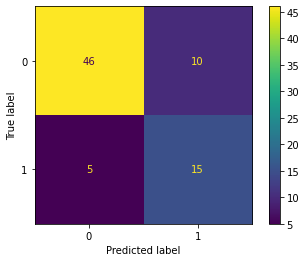

In [88]:
accuracy24=[]
precision=[]
recall=[]
f1score=[]
auc=[]

yval = set(y)
listval=[]
for k in range(0,len(yval)):
    listval.append(str(k))
    
def fit_eval_model(logmodel, X_train, y_train, X_test, y_test):    
    # Train the model
    logmodel.fit(X_train, y_train)
    # Test the model
    test_predicted = logmodel.predict(X_test)
    return test_predicted

par=best_params_list13[ac_list13.index(max(ac_list13))]
C=par['C']
intercept_scaling=par['intercept_scaling']
max_iter=par['max_iter']

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
for train_index, test_index in cv.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr_best = LogisticRegression( C= C, intercept_scaling= intercept_scaling, max_iter= max_iter )
    y_pred = fit_eval_model(lr_best, X_train, y_train, X_test, y_test)
    lr_best.fit(X_train, y_train)
    y_pred = lr_best.predict(X_test)
    
    accuracy24.append(accuracy_score(y_pred, y_test))
    precision.append(precision_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))
    f1score.append(f1_score(y_pred, y_test))
    auc.append(roc_auc_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=listval)
cmd.plot()

print('Accuracy:', np.mean(accuracy24)*100)
print('Precision:', np.mean(precision)*100)
print('Recall:', np.mean(recall)*100)
print('f1_score:', np.mean(f1score)*100)
print('AUC:',np.mean(auc))

print('Standard deviation of accuracy: ', statistics.stdev(accuracy24))
print('Standard deviation of precision: ', statistics.stdev(precision))
print('Standard deviation of recall: ', statistics.stdev(recall))
print('Standard deviation of f1_score: ', statistics.stdev(f1score))
print('Standard deviation of AUC: ', statistics.stdev(auc))

In [89]:
best_params_list13[ac_list13.index(max(ac_list13))]


{'C': 10, 'intercept_scaling': 1.0, 'max_iter': 500}

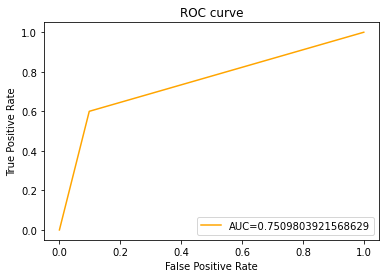

In [90]:
y_pred_proba = lr_best.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,color='orange',label="AUC="+str(auc))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Saving best model

In [91]:
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(lr1, file)

print('model saved')

model saved
